# Sequencing artifacts detection with beta binomial distribution

In [2]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import json
pd.set_option('display.max_columns', 500)
tqdm.pandas()

## Analysis on the real data


Check all mutations if they are present in other normal tissues from other patients sequenced at teh same batch.  
Create a binomial distribution of each mutation with the data from the other normal samples.  
If the mutation is following a binomial distribution, we remove it. It is likely to be an artifact.  

In [3]:
blood_suffixes_dict = {'AQ5174':'_b1',
                        'AQ5175':'_b2',
                        'AQ5176':'_b3',
                        'AQ5177':'_b4',
                        'AQ5178':'_b5',
                        'AQ5179':'_b6',
                        'AW8058':'_b7',
                        'AW8061':'_b8',
                        'AW8059':'_b9',
                        'AW8060':'_b10',
                        'AX4894':'_b11',
                        'AX4895':'_b12',
                        'AX4896':'_b13',
                        'AX4897':'_b14',
                        'AX4898':'_b15',
                       'AX4899':'_b16',
                       'AX4900':'_b17',
                       'AX4901':'_b18',
                       'AX4904':'_b19',
                       'AX4905':'_b20',
                       'AX4906':'_b21',
                       'AX4907':'_b22',
                       'AX4908':'_b23',
                       'AX4909':'_b24',
                       'AX4910':'_b25',
                       'AX4911':'_b26'
                }

In [4]:
blood_samples_dict = {'AQ5174': 'blood1',
                     'AQ5175': 'blood2',
                     'AQ5176': 'blood3',
                     'AQ5177': 'blood4',
                     'AQ5178': 'blood5',
                     'AQ5179': 'blood6',
                     'AW8058': 'blood7',
                     'AW8061': 'blood8',
                     'AW8059': 'blood9',
                     'AW8060': 'blood10',
                     'AX4894': 'blood11',
                     'AX4895': 'blood12',
                     'AX4896': 'blood13',
                     'AX4897': 'blood14',
                     'AX4898': 'blood15',
                     'AX4899': 'blood16',
                     'AX4900': 'blood17',
                     'AX4901': 'blood18',
                     'AX4904': 'blood19',
                     'AX4905': 'blood20',
                     'AX4906': 'blood21',
                     'AX4907': 'blood22',
                     'AX4908': 'blood23',
                     'AX4909': 'blood24',
                     'AX4910': 'blood25',
                     'AX4911': 'blood26'}

In [5]:
blood_bams_dict = {'AQ5174':'/workspace/datasets/sjd_seq/platinum_results/20220809/pt1-t1-allsamples-t1/AQ5174/aligner/AQ5174.bam',
                 'AQ5175': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt2-t1-allsamples-t1/AQ5175/aligner/AQ5175.bam',
                 'AQ5176': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt3-t1-allsamples-t1/AQ5176/aligner/AQ5176.bam',
                 'AQ5177': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt4-t1-allsamples-t1/AQ5177/aligner/AQ5177.bam',
                 'AQ5178': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt5-t1-allsamples-t1/AQ5178/aligner/AQ5178.bam',
                 'AQ5179': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt6-t1-allsamples-t1/AQ5179/aligner/AQ5179.bam',
                 'AW8058': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt7-t1-allsamples-t1/AW8058/aligner/AW8058.bam',
                 'AW8061': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt8-t1-allsamples-t1/AW8061/aligner/AW8061.bam',
                 'AW8059': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt10-t1-allsamples-t1/AW8059/aligner/AW8059.bam',
                 'AW8060': '/workspace/datasets/sjd_seq/platinum_results/20220809/pt11-t1-allsamples-t1/AW8060/aligner/AW8060.bam',
                 'AX4894': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt1-t1-rhabdoids-t1/AX4894/aligner/AX4894.bam',
                 'AX4895': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt3-t1-rhabdoids-t1/AX4895/aligner/AX4895.bam',
                 'AX4896': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt4-t1-rhabdoids-t1/AX4896/aligner/AX4896.bam',
                 'AX4897': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt5-t1-rhabdoids-t1/AX4897/aligner/AX4897.bam',
                 'AX4898': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt6-t1-rhabdoids-t1/AX4898/aligner/AX4898.bam',
                 'AX4899': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt7-t1-rhabdoids-t1/AX4899/aligner/AX4899.bam',
                 'AX4900': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt8-t1-rhabdoids-t1/AX4900/aligner/AX4900.bam',
                 'AX4901': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt9-t1-rhabdoids-t1/AX4901/aligner/AX4901.bam',
                 'AX4904': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt12-t1-rhabdoids-t1/AX4904/aligner/AX4904.bam',
                 'AX4905': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt13-t1-rhabdoids-t1/AX4905/aligner/AX4905.bam',
                 'AX4906': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt15-t1-rhabdoids-t1/AX4906/aligner/AX4906.bam',
                 'AX4907': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt16-t1-rhabdoids-t1/AX4907/aligner/AX4907.bam',
                 'AX4908': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt17-t1-rhabdoids-t1/AX4908/aligner/AX4908.bam',
                 'AX4909': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt18-t1-rhabdoids-t1/AX4909/aligner/AX4909.bam',
                 'AX4910': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt19-t1-rhabdoids-t1/AX4910/aligner/AX4910.bam',
                 'AX4911': '/workspace/datasets/rhabdoid_tumors/platinum_results/pt20-t1-rhabdoids-t1/AX4911/aligner/AX4911.bam',
                }

In [361]:
mut_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_filtered_vep_hc_mutect.tsv.gz',sep='\t')
mut_df.drop_duplicates(subset=['CHROM','POS','REF','ALT','mut_type'],inplace=True)
mut_df

/tmp/jobs/msanchezg/8719710/ipykernel_18669/372899898.py:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  mut_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_filtered_vep_hc_mutect.tsv.gz',sep='\t')


,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change
0,chr1,28367,G,A,False,snv,87.0,101.0,106.0,124.0,108.0,111.0,127.0,109.0,77.0,127.0,102.0,122.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0115,86,1,87,0.0495,96,5,101,0.0189,104,2,106,0.0726,115,9,124,0.0185,106,2,108,0.0270,108,3,111,0.0157,125,2,127,0.0367,105,4,109,0.0130,76,1,77,0.0236,124,3,127,0.0000,101,0,102,0.0328,118,4,122,0.0,22,0,22,0.0,20,0,20,True,True,True,True,True,True,True,True,True,True,False,True,False,False,11,1,28367,28367,G/A,+,1_28367_G/A,1:28367,A,ENSG00000227232,ENST00000488147,Transcript,"intron_variant,non_coding_transcript_variant",-,-,-,-,-,rs1450278619,MODIFIER,-,-1,-,WASH7P,HGNC,HGNC:38034,YES,-,-,-,-,-,-,-,-,-,-,rs1450278619,0.000000,-,G/A
1,chr1,775209,-,A,False,indel,70.0,127.0,140.0,136.0,122.0,122.0,123.0,153.0,51.0,144.0,101.0,126.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0204,48,1,49,0.0118,84,1,85,0.0000,103,0,103,0.0000,108,0,108,0.0000,99,0,99,0.0115,86,1,87,0.0215,91,2,93,0.0488,117,6,123,0.2286,27,8,35,0.0095,104,1,105,0.0769,72,6,78,0.0102,97,1,98,0.0,33,0,33,0.0,31,0,31,True,True,False,False,False,True,True,True,True,True,True,True,False,False,9,1,775209,775208,-/A,+,1_775209_-/A,1:775208-775209,A,ENSG00000228327,ENST00000506640,Transcript,"intron_variant,non_coding_transcript_variant",-,-,-,-,-,rs1183307545,MODIFIER,-,-1,-,AL669831.1,Clone_based_ensembl_gene,-,YES,-,-,-,-,-,-,-,-,-,-,chr1:775209-775209,0.051630,-,-/A
2,chr1,783717,A,C,False,snv,79.0,157.0,161.0,119.0,127.0,115.0,125.0,141.0,70.0,137.0,114.0,149.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.1519,67,12,79,0.1720,130,27,157,0.1553,136,25,161,0.0084,117,1,119,0.0079,126,1,127,0.0261,112,3,115,0.0480,119,6,125,0.0638,132,9,141,0.1000,63,7,70,0.0584,129,8,137,0.0263,111,3,114,0.0268,145,4,149,0.0,37,0,37,0.0,40,0,40,True,True,True,True,True,True,True,True,True,True,True,True,False,False,12,1,783717,783717,A/C,+,1_783717_A/C,1:783717,C,ENSG00000285268,ENST00000644482,Transcript,downstream_gene_variant,-,-,-,-,-,rs4498745,MODIFIER,1667,1,-,AL669831.6,Clone_based_ensembl_gene,-,YES,-,-,-,-,-,-,-,-,-,-,rs4498745,0.000221,-,A/C
3,chr1,860179,-,TTTTT,False,indel,78.0,98.0,107.0,81.0,102.0,89.0,107.0,83.0,55.0,104.0,93.0,94.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0263,37,1,38,0.0000,53,0,53,0.0000,63,0,63,0.0000,60,0,60,0.0000,67,0,67,0.0000,65,0,65,0.0247,79,2,81,0.0000,60,0,60,0.0000,37,0,37,0.0149,66,1,67,0.0189,52,1,53,0.0000,63,0,63,0.0,8,0,8,0.0,13,0,13,True,False,False,False,False,False,True,False,False,True,True,False,False,False,4,1,860179,860178,-/TTTTT,+,1_860179_-/TTTTT,1:860178-860179,TTTTT,ENSG00000288531,ENST00000671208,Tran

In [362]:
mut_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_filtered_vep_hc_mutect.tsv.gz',sep='\t')
mut_df.drop_duplicates(subset=['CHROM','POS','REF','ALT','mut_type'],inplace=True)

#preapre table for blood mut calling
blood_cols = []
mut_blood_df = mut_df[['CHROM','POS','REF','ALT','mut_type']]
mut_blood_df = mut_blood_df[['CHROM','POS','REF','ALT','mut_type']].drop_duplicates()
mut_blood_df.groupby('mut_type').count()

/tmp/jobs/msanchezg/8719710/ipykernel_18669/3816957108.py:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  mut_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_filtered_vep_hc_mutect.tsv.gz',sep='\t')


,CHROM,POS,REF,ALT
mut_type,,,,
indel,490352,490352,490352,490352
snv,160933,160933,160933,160933


In [363]:
#save necessary json files for running the python script
import json

mut_blood_df.to_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_vep_hc_mutect_blood_cols.tsv.gz',sep='\t',compression='gzip',index=None)

with(open('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/blood_suffixes_dict.json','w')) as f:
    json.dump(blood_suffixes_dict,f)
with(open('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/blood_samples_dict.json','w')) as f:
    json.dump(blood_samples_dict,f)
with(open('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/blood_bams_dict.json','w')) as f:
    json.dump(blood_bams_dict,f)

Perform mutation calling of snv/indel muts in blood bams

In [364]:
#load annotated mutations from normal blood bams
blood_snv_bam_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/blood_snv_muts_from_bam.tsv.gz',sep='\t')
blood_indel_bam_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/blood_indel_muts_from_bam.tsv.gz',sep='\t')
blood_bam_df = pd.concat([blood_snv_bam_df,blood_indel_bam_df],ignore_index=True)
blood_bam_df.drop(['AF_b1','ref_reads_b1','alt_reads_b1','DP_b1','blood1'],inplace=True,axis=1)

#some positions are more prone to be mutated
grp_df = blood_bam_df.groupby(['CHROM','POS','REF']).count().sort_values('ALT',ascending=False)
grp_df[grp_df['ALT']>1]

,,,ALT,AF_b2,ref_reads_b2,alt_reads_b2,DP_b2,AF_b3,ref_reads_b3,alt_reads_b3,DP_b3,AF_b4,ref_reads_b4,alt_reads_b4,DP_b4,AF_b5,ref_reads_b5,alt_reads_b5,DP_b5,AF_b6,ref_reads_b6,alt_reads_b6,DP_b6,AF_b7,ref_reads_b7,alt_reads_b7,DP_b7,AF_b8,ref_reads_b8,alt_reads_b8,DP_b8,AF_b9,ref_reads_b9,alt_reads_b9,DP_b9,AF_b10,ref_reads_b10,alt_reads_b10,DP_b10,AF_b11,ref_reads_b11,alt_reads_b11,DP_b11,AF_b12,ref_reads_b12,alt_reads_b12,DP_b12,AF_b13,ref_reads_b13,alt_reads_b13,DP_b13,AF_b14,ref_reads_b14,alt_reads_b14,DP_b14,AF_b15,ref_reads_b15,alt_reads_b15,DP_b15,AF_b16,ref_reads_b16,alt_reads_b16,DP_b16,AF_b17,ref_reads_b17,alt_reads_b17,DP_b17,AF_b18,ref_reads_b18,alt_reads_b18,DP_b18,AF_b19,ref_reads_b19,alt_reads_b19,DP_b19,AF_b20,ref_reads_b20,alt_reads_b20,DP_b20,AF_b21,ref_reads_b21,alt_reads_b21,DP_b21,AF_b22,ref_reads_b22,alt_reads_b22,DP_b22,AF_b23,ref_reads_b23,alt_reads_b23,DP_b23,AF_b24,ref_reads_b24,alt_reads_b24,DP_b24,AF_b25,ref_reads_b25,alt_reads_b25,DP_b25,AF_b26,ref_reads_b26,alt_reads_b26,DP_b26,blood2,blood3,blood4,blood5,blood6,blood7,blood8,blood9,blood10,blood11,blood12,blood13,blood14,blood15,blood16,blood17,blood18,blood19,blood20,blood21,blood22,blood23,blood24,blood25,blood26
CHROM,POS,REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
chr6,159304813,-,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
chr8,61232024,-,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
chr22,32014223,-,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
chr8,41919830,-,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
chr5,171893422,-,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr10,117609762,-,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,

### Run betabinomial test script

Script is ready here:\
`/workspace/projects/sjd_pediatric_tumors/code/filters/calculate_pvals_betabinom.py`

In [367]:
ref_blood_cols = ['ref_reads'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
alt_blood_cols = ['alt_reads'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
DP_blood_cols = ['DP'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
AF_blood_cols = ['AF'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
read_blood_cols = ref_blood_cols + alt_blood_cols + DP_blood_cols + AF_blood_cols

In [368]:
suffixes_dict

{'tumor1': '_t1',
 'tumor2': '_t2',
 'blood': '_b',
 'kidney': '_k',
 'liver': '_l',
 'pancreas': '_p',
 'heart': '_h',
 'lung': '_lu',
 'medulla': '_me',
 'spleen': '_s',
 'brain': '_br',
 'bma': '_bm'}

In [369]:
#load mutations data from tissues
mut_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_filtered_vep_hc_mutect.tsv.gz',sep='\t')
mut_df.drop_duplicates(subset=['CHROM','POS','REF','ALT','mut_type'],inplace=True)

#load annotated mutations from normal blood bams
blood_snv_bam_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/blood_snv_muts_from_bam.tsv.gz',sep='\t')
blood_indel_bam_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/blood_indel_muts_from_bam.tsv.gz',sep='\t')
blood_bam_df = pd.concat([blood_snv_bam_df,blood_indel_bam_df],ignore_index=True)
blood_cols = [blood_samples_dict[tissue] for tissue in blood_samples_dict.keys() if tissue != 'AQ5174' ]
blood_bam_df.drop(['AF_b1','ref_reads_b1','alt_reads_b1','DP_b1','blood1'],inplace=True,axis=1)

ref_blood_cols = ['ref_reads'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
alt_blood_cols = ['alt_reads'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
DP_blood_cols = ['DP'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
AF_blood_cols = ['AF'+blood_suffixes_dict[sample] for sample in blood_suffixes_dict.keys() if sample != 'AQ5174']
read_blood_cols = ref_blood_cols + alt_blood_cols + DP_blood_cols + AF_blood_cols

suffixes_dict = json.load(open('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/suffixes_dict.json','rb'))
alt_reads_cols = ['alt_reads'+suffixes_dict[sample] for sample in suffixes_dict.keys()]
DP_cols = ['DP'+suffixes_dict[sample] for sample in suffixes_dict.keys()]
pvals_cols = ['pval_sa'+suffixes_dict[sample] for sample in suffixes_dict.keys()]

main_cols = ['CHROM','POS','REF','ALT']
mut2_df = pd.merge(mut_df[main_cols+alt_reads_cols+DP_cols],blood_bam_df[main_cols+alt_blood_cols+DP_blood_cols],how='left')
mut2_df.drop_duplicates(inplace=True,subset=main_cols)
mut2_df

/tmp/jobs/msanchezg/8719710/ipykernel_18669/3887020735.py:2: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  mut_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_filtered_vep_hc_mutect.tsv.gz',sep='\t')


,CHROM,POS,REF,ALT,alt_reads_t1,alt_reads_t2,alt_reads_b,alt_reads_k,alt_reads_l,alt_reads_p,alt_reads_h,alt_reads_lu,alt_reads_me,alt_reads_s,alt_reads_br,alt_reads_bm,DP_t1,DP_t2,DP_b,DP_k,DP_l,DP_p,DP_h,DP_lu,DP_me,DP_s,DP_br,DP_bm,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,DP_b2,DP_b3,DP_b4,DP_b5,DP_b6,DP_b7,DP_b8,DP_b9,DP_b10,DP_b11,DP_b12,DP_b13,DP_b14,DP_b15,DP_b16,DP_b17,DP_b18,DP_b19,DP_b20,DP_b21,DP_b22,DP_b23,DP_b24,DP_b25,DP_b26
0,chr1,28367,G,A,1,5,2,9,2,3,2,4,1,3,0,4,87,101,106,124,108,111,127,109,77,127,102,122,0,5,2,0,3,6,2,4,1,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,39,53,71,94,143,94,70,127,135,15,28,20,18,28,24,11,31,15,25,38,30,23,34,34,25
1,chr1,775209,-,A,1,1,0,0,0,1,2,6,8,1,6,1,49,85,103,108,99,87,93,123,35,105,78,98,30,1,1,2,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,81,100,95,91,96,87,119,82,87,17,27,22,22,20,17,24,29,20,28,26,24,23,18,22,25
2,chr1,783717,A,C,12,27,25,1,1,3,6,9,7,8,3,4,79,157,161,119,127,115,125,141,70,137,114,149,21,0,0,0,0,0,0,3,1,4,0,4,0,0,0,0,0,0,1,1,2,0,0,0,0,136,147,133,110,108,151,134,145,149,47,55,35,32,30,22,37,47,34,36,43,27,38,38,28,42
3,chr1,860179,-,TTTTT,1,0,0,0,0,0,2,0,0,1,1,0,38,53,63,60,67,65,81,60,37,67,53,63,19,0,1,17,0,15,1,25,3,0,2,0,0,0,0,0,1,9,1,0,0,1,0,1,0,62,85,77,64,75,86,64,87,64,27,22,27,18,25,26,22,16,20,17,20,19,24,19,19,20
4,chr1,860179,-,TTTTTTTTTTT,1,0,0,0,0,0,2,0,0,1,1,0,38,53,63,60,67,65,81,60,37,67,53,63,19,0,1,17,0,15,1,25,3,0,2,0,0,0,0,0,1,9,1,0,0,1,0,1,0,62,85,77,64,75,86,64,87,64,27,22,27,18,25,26,22,16,20,17,20,19,24,19,19,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651280,chrX,156008922,TGTGTGTGTGTTTGTGTGTGTATGTCTGTG,-,0,0,1,1,0,0,0,0,1,0,0,0,100,87,115,125,107,105,138,131,55,109,110,109,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,90,164,238,197,163,258,238,221,229,71,59,31,31,69,56,75,73,56,47,50,40,41,53,55,58
651281,chrX,156008942,TATGTC,-,0,1,0,1,0,0,0,0,0,0,0,0,100,101,122,130,114,115,141,137,55,125,117,121,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,104,195,256,219,188,276,267,240,268,79,69,38,26,81,63,78,91,69,49,52,47,41,64,62,61
651282,chrX,156008948,TG,-,1,0,0,3,3,2,1,1,1,1,3,0,93,93,114,121,105,97,131,116,45,111,89,107,1,1,0,0,0,1,0,1,3,1,0,0,0,3,5,1,1,1,0,0,1,0,0,0,2,96,196,249,208,184,251,238,199,222,71,56,36,22,64,51,77,81,55,45,48,41,41,55,54,49
651283,chrX,156008960,TTTA,-,0,1,1,0,1,1,1,0,0,0,0,0,86,101,118,134,108,109,146,131,48,122,103,121,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,100,212,261,212,187,276,262,227,241,82,61,33,27,79,54,77,80,68,51,49,48,46,61,66,57


In [372]:
#remove muts with all 0's and muts that are clear artifacts (muts in all blood samples)
def present_at_cohort(row,alt_blood_cols):
    alt_cols = [True if reads > 0 else False for reads in row[alt_blood_cols] ]
    if sum(alt_cols) > 0:
        return True
    else:
        return False
    
mut2_df['present_at_cohort'] = mut2_df.progress_apply(lambda row: present_at_cohort(row,alt_blood_cols),axis=1)

def present_at_all_bloods(row,alt_blood_cols):
    alt_cols = [True if reads > 0 else False for reads in row[alt_blood_cols] ]
    if sum(alt_cols) == len(alt_blood_cols):
        return True
    else:
        return False
mut2_df['present_at_all_bloods'] = mut2_df.progress_apply(lambda row: present_at_all_bloods(row,alt_blood_cols),axis=1)

#make a shorter table to run the code, so we save some compilation time
mut3_df = mut2_df[(mut2_df['present_at_all_bloods']==False)&(mut2_df['present_at_cohort']==True)]
mut3_df

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

,CHROM,POS,REF,ALT,alt_reads_t1,alt_reads_t2,alt_reads_b,alt_reads_k,alt_reads_l,alt_reads_p,alt_reads_h,alt_reads_lu,alt_reads_me,alt_reads_s,alt_reads_br,alt_reads_bm,DP_t1,DP_t2,DP_b,DP_k,DP_l,DP_p,DP_h,DP_lu,DP_me,DP_s,DP_br,DP_bm,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,DP_b2,DP_b3,DP_b4,DP_b5,DP_b6,DP_b7,DP_b8,DP_b9,DP_b10,DP_b11,DP_b12,DP_b13,DP_b14,DP_b15,DP_b16,DP_b17,DP_b18,DP_b19,DP_b20,DP_b21,DP_b22,DP_b23,DP_b24,DP_b25,DP_b26,present_at_cohort,present_at_all_bloods
0,chr1,28367,G,A,1,5,2,9,2,3,2,4,1,3,0,4,87,101,106,124,108,111,127,109,77,127,102,122,0,5,2,0,3,6,2,4,1,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,39,53,71,94,143,94,70,127,135,15,28,20,18,28,24,11,31,15,25,38,30,23,34,34,25,True,False
1,chr1,775209,-,A,1,1,0,0,0,1,2,6,8,1,6,1,49,85,103,108,99,87,93,123,35,105,78,98,30,1,1,2,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,81,100,95,91,96,87,119,82,87,17,27,22,22,20,17,24,29,20,28,26,24,23,18,22,25,True,False
2,chr1,783717,A,C,12,27,25,1,1,3,6,9,7,8,3,4,79,157,161,119,127,115,125,141,70,137,114,149,21,0,0,0,0,0,0,3,1,4,0,4,0,0,0,0,0,0,1,1,2,0,0,0,0,136,147,133,110,108,151,134,145,149,47,55,35,32,30,22,37,47,34,36,43,27,38,38,28,42,True,False
3,chr1,860179,-,TTTTT,1,0,0,0,0,0,2,0,0,1,1,0,38,53,63,60,67,65,81,60,37,67,53,63,19,0,1,17,0,15,1,25,3,0,2,0,0,0,0,0,1,9,1,0,0,1,0,1,0,62,85,77,64,75,86,64,87,64,27,22,27,18,25,26,22,16,20,17,20,19,24,19,19,20,True,False
4,chr1,860179,-,TTTTTTTTTTT,1,0,0,0,0,0,2,0,0,1,1,0,38,53,63,60,67,65,81,60,37,67,53,63,19,0,1,17,0,15,1,25,3,0,2,0,0,0,0,0,1,9,1,0,0,1,0,1,0,62,85,77,64,75,86,64,87,64,27,22,27,18,25,26,22,16,20,17,20,19,24,19,19,20,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651280,chrX,156008922,TGTGTGTGTGTTTGTGTGTGTATGTCTGTG,-,0,0,1,1,0,0,0,0,1,0,0,0,100,87,115,125,107,105,138,131,55,109,110,109,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,90,164,238,197,163,258,238,221,229,71,59,31,31,69,56,75,73,56,47,50,40,41,53,55,58,True,False
651281,chrX,156008942,TATGTC,-,0,1,0,1,0,0,0,0,0,0,0,0,100,101,122,130,114,115,141,137,55,125,117,121,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,104,195,256,219,188,276,267,240,268,79,69,38,26,81,63,78,91,69,49,52,47,41,64,62,61,True,False
651282,chrX,156008948,TG,-,1,0,0,3,3,2,1,1,1,1,3,0,93,93,114,121,105,97,131,116,45,111,89,107,1,1,0,0,0,1,0,1,3,1,0,0,0,3,5,1,1,1,0,0,1,0,0,0,2,96,196,249,208,184,251,238,199,222,71,56,36,22,64,51,77,81,55,45,48,41,41,55,54,49,True,False
651283,chrX,156008960,TTTA,-,0,1,1,0,1,1,1,0,0,0,0,0,86,101,118,134,108,109,146,131,48,122,103,121,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,100,212,261,212,187,276,262,227,241,82,61,33,27,79,54,77,80,68,51,49,48,46,61,66,57,True,False


In [373]:
mut2_df[main_cols+['present_at_all_bloods']].groupby('present_at_all_bloods').count()

,CHROM,POS,REF,ALT
present_at_all_bloods,,,,
False,649559,649559,649559,649559
True,1726,1726,1726,1726


In [374]:
mut2_df[main_cols+['present_at_cohort']].groupby('present_at_cohort').count()

,CHROM,POS,REF,ALT
present_at_cohort,,,,
False,105797,105797,105797,105797
True,545488,545488,545488,545488


In [375]:
chroms = ['chr'+str(i) for i in range(1,23)]
chroms.append('chrX')

In [376]:
for chrom in tqdm(chroms):
    mut3_df[mut3_df['CHROM']==chrom].to_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/betabinom/'+chrom+'_input.tsv.gz',index=None,sep='\t')

  0%|          | 0/23 [00:00<?, ?it/s]

### Load script output and prepare table

In [399]:
output_df = pd.DataFrame()
for chrom in chroms:
    df1 = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/betabinom/'+chrom+'_output.tsv.gz',sep='\t')
    output_df = pd.concat([output_df,df1],ignore_index=True)
output_df

,CHROM,POS,REF,ALT,alt_reads_t1,alt_reads_t2,alt_reads_b,alt_reads_k,alt_reads_l,alt_reads_p,alt_reads_h,alt_reads_lu,alt_reads_me,alt_reads_s,alt_reads_br,alt_reads_bm,DP_t1,DP_t2,DP_b,DP_k,DP_l,DP_p,DP_h,DP_lu,DP_me,DP_s,DP_br,DP_bm,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,DP_b2,DP_b3,DP_b4,DP_b5,DP_b6,DP_b7,DP_b8,DP_b9,DP_b10,DP_b11,DP_b12,DP_b13,DP_b14,DP_b15,DP_b16,DP_b17,DP_b18,DP_b19,DP_b20,DP_b21,DP_b22,DP_b23,DP_b24,DP_b25,DP_b26,present_at_cohort,present_at_all_bloods,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm
0,chr1,28367,G,A,1,5,2,9,2,3,2,4,1,3,0,4,87,101,106,124,108,111,127,109,77,127,102,122,0,5,2,0,3,6,2,4,1,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,39,53,71,94,143,94,70,127,135,15,28,20,18,28,24,11,31,15,25,38,30,23,34,34,25,True,False,0.949326,0.632460,0.901153,0.435677,0.903985,0.834997,0.925843,0.748369,0.938548,0.864919,1.000000,0.784088
1,chr1,775209,-,A,1,1,0,0,0,1,2,6,8,1,6,1,49,85,103,108,99,87,93,123,35,105,78,98,30,1,1,2,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,81,100,95,91,96,87,119,82,87,17,27,22,22,20,17,24,29,20,28,26,24,23,18,22,25,True,False,0.877486,0.944962,0.999999,1.000000,1.000001,0.946941,0.874713,0.627633,0.030816,0.960839,0.411737,0.956157
2,chr1,783717,A,C,12,27,25,1,1,3,6,9,7,8,3,4,79,157,161,119,127,115,125,141,70,137,114,149,21,0,0,0,0,0,0,3,1,4,0,4,0,0,0,0,0,0,1,1,2,0,0,0,0,136,147,133,110,108,151,134,145,149,47,55,35,32,30,22,37,47,34,36,43,27,38,38,28,42,True,False,0.046333,0.020187,0.031994,0.918740,0.925051,0.703342,0.463238,0.327739,0.165781,0.369990,0.700696,0.690972
3,chr1,860179,-,TTTTT,1,0,0,0,0,0,2,0,0,1,1,0,38,53,63,60,67,65,81,60,37,67,53,63,19,0,1,17,0,15,1,25,3,0,2,0,0,0,0,0,1,9,1,0,0,1,0,1,0,62,85,77,64,75,86,64,87,64,27,22,27,18,25,26,22,16,20,17,20,19,24,19,19,20,True,False,0.942497,1.000000,1.000000,1.000000,1.000001,1.000000,0.961811,1.000000,1.000000,0.982863,0.970891,1.000000
4,chr1,860179,-,TTTTTTTTTTT,1,0,0,0,0,0,2,0,0,1,1,0,38,53,63,60,67,65,81,60,37,67,53,63,19,0,1,17,0,15,1,25,3,0,2,0,0,0,0,0,1,9,1,0,0,1,0,1,0,62,85,77,64,75,86,64,87,64,27,22,27,18,25,26,22,16,20,17,20,19,24,19,19,20,True,False,0.942497,1.000000,1.000000,1.000000,1.000001,1.000000,0.961811,1.000000,1.000000,0.982863,0.970891,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543757,chrX,156008922,TGTGTGTGTGTTTGTGTGTGTATGTCTGTG,-,0,0,1,1,0,0,0,0,1,0,0,0,100,87,115,125,107,105,138,131,55,109,110,109,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,90,164,238,197,163,258,238,221,229,71,59,31,31,69,56,75,73,56,47,50,40,41,53,55,58,True,False,1.000000,1.000000,0.864295,0.875175,0.999999,1.000000,0.999999,1.000000,0.734506,1.000000,0.999999,1.000000
543758,chrX,156008942,TATGTC,-,0,1,0,1,0,0,0,0,0,0,0,0,100,101,122,130,114,115,141,137,55,125,117,121,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,104,195,256,219,188,276,267,240,268,79,69,38,26,81,63,78,91,69,49,52,47,41,64,62,61,True,False,1.000000,0.838159,1.000000,0.873219,1.000000,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
543759,chrX,156008948,TG,-,1,0,0,3,3,2,1,1,1,1,3,0,93,93,114,121,105,97,131,116,45,111,89,107,1,1,0,0,0,1,0,1,3,1,0,0,0,3,5,1,1,1,0,0,1,0,0,0,2,96,196,249,208,184,251,238,199,222,71,56,36,22,64,51,77,81,55,45,48,41,41,55,54,49,True,False,0.885772,1.000000,1.000001,0.709464,0.665761,0.763762,0.924064,0.911932,0.

In [400]:
# mut4_df = pd.merge(mut3_df,output_df,how='outer') #merge input with output (necessary?)
pval_sa_cols = ['pval_sa'+suffixes_dict[sample] for sample in suffixes_dict.keys()]
mut4_df = pd.merge(mut2_df,output_df,how='outer') #merge with complete list with present_in_all_bloods==True and present_at_cohort==False 
mut5_df = pd.merge(mut_df,mut4_df[main_cols+alt_blood_cols+pval_sa_cols+['present_at_cohort','present_at_all_bloods']],how='outer') #merge with original mut table columns
mut5_df

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods
0,chr1,28367,G,A,False,snv,87.0,101.0,106.0,124.0,108.0,111.0,127.0,109.0,77.0,127.0,102.0,122.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0115,86,1,87,0.0495,96,5,101,0.0189,104,2,106,0.0726,115,9,124,0.0185,106,2,108,0.0270,108,3,111,0.0157,125,2,127,0.0367,105,4,109,0.0130,76,1,77,0.0236,124,3,127,0.0000,101,0,102,0.0328,118,4,122,0.0,22,0,22,0.0,20,0,20,True,True,True,True,True,True,True,True,True,True,False,True,False,False,11,1,28367,28367,G/A,+,1_28367_G/A,1:28367,A,ENSG00000227232,ENST00000488147,Transcript,"intron_variant,non_coding_transcript_variant",-,-,-,-,-,rs1450278619,MODIFIER,-,-1,-,WASH7P,HGNC,HGNC:38034,YES,-,-,-,-,-,-,-,-,-,-,rs1450278619,0.000000,-,G/A,0,5,2,0,3,6,2,4,1,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0.949326,0.632460,0.901153,0.435677,0.903985,0.834997,0.925843,0.748369,0.938548,0.864919,1.000000,0.784088,True,False
1,chr1,775209,-,A,False,indel,70.0,127.0,140.0,136.0,122.0,122.0,123.0,153.0,51.0,144.0,101.0,126.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0204,48,1,49,0.0118,84,1,85,0.0000,103,0,103,0.0000,108,0,108,0.0000,99,0,99,0.0115,86,1,87,0.0215,91,2,93,0.0488,117,6,123,0.2286,27,8,35,0.0095,104,1,105,0.0769,72,6,78,0.0102,97,1,98,0.0,33,0,33,0.0,31,0,31,True,True,False,False,False,True,True,True,True,True,True,True,False,False,9,1,775209,775208,-/A,+,1_775209_-/A,1:775208-775209,A,ENSG00000228327,ENST00000506640,Transcript,"intron_variant,non_coding_transcript_variant",-,-,-,-,-,rs1183307545,MODIFIER,-,-1,-,AL669831.1,Clone_based_ensembl_gene,-,YES,-,-,-,-,-,-,-,-,-,-,chr1:775209-775209,0.051630,-,-/A,30,1,1,2,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0.877486,0.944962,0.999999,1.000000,1.000001,0.946941,0.874713,0.627633,0.030816,0.960839,0.411737,0.956157,True,False
2,chr1,783717,A,C,False,snv,79.0,157.0,161.0,119.0,127.0,115.0,125.0,141.0,70.0,137.0,114.0,149.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.1519,67,12,79,0.1720,130,27,157,0.1553,136,25,161,0.0084,117,1,119,0.0079,126,1,127,0.0261,112,3,115,0.0480,119,6,125,0.0638,132,9,141,0.1000,63,7,70,0.0584,129,8,137,0.0263,111,3,114,0.0268,145,4,149,0.0,37,0,37,0.0,40,0,40,True,True,True

In [401]:
from scipy import stats

In [402]:
#adjusted pval

def fdr(p_val,total,ranked_p_values,suffix,i):
    fdr = p_val * total / ranked_p_values[i]
    if fdr > 1:
        fdr = 1
    i =  i +1
    return fdr

for tissue in suffixes_dict.keys():
    suffix = suffixes_dict[tissue]
    p_vals = df1['pval_sa'+suffix]
    ranked_p_values = stats.rankdata(p_vals)
    total = len(p_vals)
    i = 0
    mut5_df['qval_sa'+suffix] = mut5_df['pval_sa'+suffix].progress_apply(lambda p_val: fdr(p_val,total,ranked_p_values,suffix,i))


  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

In [403]:
#redefine present at cohort:

def present_at_cohort(row,alt_blood_cols,pval_sa_cols):
    
    alt_cols = [True if reads > 0 else False for reads in row[alt_blood_cols]]
    pval_cols = [True if np.isnan(pval) else False for pval in row[pval_sa_cols]]
    
    if sum(alt_cols) > 0 and sum(pval_cols) == 0:
        return True
    else:
        return False
    
mut5_df['present_at_cohort'] = mut5_df.progress_apply(lambda row: present_at_cohort(row,alt_blood_cols,pval_sa_cols),axis=1)
mut5_df[mut5_df['pval_sa_t1'].isnull()]

  0%|          | 0/651285 [00:00<?, ?it/s]

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm
8,chr1,865445,G,C,False,snv,81.0,136.0,128.0,152.0,140.0,134.0,151.0,142.0,81.0,158.0,149.0,155.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0000,81,0,81,0.3015,95,41,136,0.0000,128,0,128,0.0263,148,4,152,0.0000,140,0,140,0.000,134,0,134,0.0066,148,1,151,0.0070,141,1,142,0.0000,81,0,81,0.0000,158,0,158,0.0000,149,0,149,0.0000,155,0,155,0.0,33,0,33,0.0,32,0,32,False,True,False,True,False,False,True,True,False,False,False,False,False,False,4,1,865445,865445,G/C,+,1_865445_G/C,1:865445,C,ENSG00000288531,ENST00000671208,Transcript,non_coding_transcript_exon_variant,1234,-,-,-,-,-,MODIFIER,-,1,-,AL669831.7,Clone_based_ensembl_gene,-,YES,-,-,-,-,-,-,-,-,-,-,-,0.000000,-,G/C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,chr1,962074,-,CCCCC,False,indel,99.0,110.0,106.0,102.0,134.0,104.0,93.0,102.0,46.0,135.0,127.0,98.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0000,73,0,73,0.0000,85,0,85,0.0000,86,0,86,0.0000,94,0,94,0.0000,117,0,117,0.000,91,0,91,0.0000,88,0,88,0.0116,85,1,86,0.0000,36,0,36,0.0000,118,0,118,0.0000,112,0,112,0.0000,84,0,84,0.0,10,0,10,0.0,11,0,11,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,1,962074,962073,-/CCCCC,+,1_962074_-/CCCCC,1:962073-962074,CCCCC,ENSG00000187961,ENST00000338591,Transcript,intron_variant,-,-,-,-,-,rs748154276,MODIFIER,-,1,-,KLHL17,HGNC,HGNC:24023,YES,ENSP00000343930,-,-,-,-,-,-,-,-,-,chr1:962074-962074,0.004183,-,-/CCCCC,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,chr1,962074,-,CCC,False,indel,99.0,110.0,106.0,102.0,134.0,104.0,93.0,102.0,46.0,135.0,127.0,98.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.0000,73,0,73,0.0000,85,0,85,0.0000,86,0,86,0.0000,94,0,94,0.0000,117,0,117,0.000,91,0,91,0.0000,88,0,88,0.0116,85,1,86,0.0000,36,0,36,0.0000,118,0,118

In [404]:
def sequencing_artifact (row,alt_reads_cols,qval_sa_cols,threshold,min_reads):
    
    reads_list = [True if reads >= min_reads else False for reads in row[alt_reads_cols] ]
    qvals_list = [True if qval > threshold else False for qval in row[qval_sa_cols] ]
    
    #if the mutations is present in all samples from the blood cohort, it is an artifact
    if row['present_at_all_bloods'] == True:
        return True
    else:
        #if the mutation is not present in the blood cohort
        if row['present_at_cohort'] == False:
            
            #if it is clonal in the tumors, it is not an artifact
            if (row['AF_t1'] > 0.25 or row['AF_t2'] > 0.2):
                return False
            
            #if it is present in at least 2 tissues, and in one of them has a minimum of n reads,
            #it is not an artifact
            elif row['n_tissues'] >= 2 and any(reads_list):
                return False
            else:
                return True
            
        else:
            
            #if it is present in the cohort, and in at least 1 sample the mutation follows a betabinomial
            #it is an artifact
            if any(qvals_list):
                return True
            else:
                return False

In [405]:
qval_sa_cols = ['qval_sa'+suffixes_dict[sample] for sample in suffixes_dict.keys()]

In [406]:
mut5_df['sequencing_artifact_min15'] = mut5_df.progress_apply(lambda row: sequencing_artifact(row,alt_reads_cols,qval_sa_cols,threshold=0.00001,min_reads=15),axis=1)

  0%|          | 0/651285 [00:00<?, ?it/s]

In [436]:
mut5_df['sequencing_artifact_min10'] = mut5_df.progress_apply(lambda row: sequencing_artifact(row,alt_reads_cols,qval_sa_cols,threshold=0.00001,min_reads=10),axis=1)
mut5_df['sequencing_artifact_min5'] = mut5_df.progress_apply(lambda row: sequencing_artifact(row,alt_reads_cols,qval_sa_cols,threshold=0.00001,min_reads=5),axis=1)
mut5_df['sequencing_artifact_min2'] = mut5_df.progress_apply(lambda row: sequencing_artifact(row,alt_reads_cols,qval_sa_cols,threshold=0.00001,min_reads=2),axis=1)

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

  0%|          | 0/651285 [00:00<?, ?it/s]

In [437]:
mut5_df.groupby(['sequencing_artifact_min15']).count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
sequencing_artifact_min15,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,2438,4,4,4,4,4,4,4,4,4,4,4,4,2438,2438,4,4,4,4,4,4,4,4,4,4,4,4,2438,2438,2438
True,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847,648847

In [438]:
mut5_df.groupby(['sequencing_artifact_min15','present_at_cohort']).count()

CHROM     POS     REF     ALT  \
sequencing_artifact_min15 present_at_cohort                                   
False                     False                2434    2434    2434    2434   
                          True                    4       4       4       4   
True                      False              179022  179022  179022  179022   
                          True               469825  469825  469825  469825   

                                             parents  mut_type  depth_t1  \
sequencing_artifact_min15 present_at_cohort                                
False                     False                 2434      2434      2434   
                          True                     4         4         4   
True                      False               179022    179022    179022   
                          True                469825    469825    469825   

                                             depth_t2  depth_b  depth_k  \
sequencing_artifact_min15 present_at_cohort                               
False                     False                  2434     2434     2434   
                          True                      4        4        4   
True                      False                179022   179022   179022   
                          True                 469825   469825   469825   

                                             depth_l  depth_p  depth_h  \
sequencing_artifact_min15 present_at_cohort                              
False                     False                 2434     2434     2434   
                          True                     4        4        4   
True                      False               179022   179022   179022   
                          True                469825   469825   469825   

                                             depth_lu  depth_me  depth_s  \
sequencing_artifact_min15 present_at_cohort                                
False                     False                  2434      2434     2434   
                          True                      4         4        4   
True                      False                179022    179022   179022   
                          True                 469825    469825   469825   

                                             depth_br  depth_bm  \
sequencing_artifact_min15 present_at_cohort                       
False                     False                  2434      2434   
                          True                      4         4   
True                      False                179022    179022   
                          True                 469825    469825   

                                             filter_depth_t1  filter_depth_t2  \
sequencing_artifact_min15 present_at_cohort                                     
False                     False                         2434             2434   
                          True                             4                4   
True                      False                       179022           179022   
                          True                        469825           469825   

                                             filter_depth_b  filter_depth_k  \
sequencing_artifact_min15 present_at_cohort                                   
False                     False                        2434            2434   
                          True                            4               4   
True                      False                      179022          179022   
                          True                       469825          469825   

                                             filter_depth_l  filter_depth_p  \
sequencing_artifact_min15 present_at_cohort                                   
False                     False                        2434            2434   
                          True                            4               4   
True                      False                      179022          179022   
 

In [439]:
mut5_df.groupby(['sequencing_artifact_min10']).count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min5,sequencing_artifact_min2
sequencing_artifact_min10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,4,4,4,4,4,4,4,4,4,4,4,4,3064,3064,4,4,4,4,4,4,4,4,4,4,4,4,3064,3064,3064
True,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221,648221

In [440]:
mut5_df.groupby(['sequencing_artifact_min10','present_at_cohort']).count()

CHROM     POS     REF     ALT  \
sequencing_artifact_min10 present_at_cohort                                   
False                     False                3060    3060    3060    3060   
                          True                    4       4       4       4   
True                      False              178396  178396  178396  178396   
                          True               469825  469825  469825  469825   

                                             parents  mut_type  depth_t1  \
sequencing_artifact_min10 present_at_cohort                                
False                     False                 3060      3060      3060   
                          True                     4         4         4   
True                      False               178396    178396    178396   
                          True                469825    469825    469825   

                                             depth_t2  depth_b  depth_k  \
sequencing_artifact_min10 present_at_cohort                               
False                     False                  3060     3060     3060   
                          True                      4        4        4   
True                      False                178396   178396   178396   
                          True                 469825   469825   469825   

                                             depth_l  depth_p  depth_h  \
sequencing_artifact_min10 present_at_cohort                              
False                     False                 3060     3060     3060   
                          True                     4        4        4   
True                      False               178396   178396   178396   
                          True                469825   469825   469825   

                                             depth_lu  depth_me  depth_s  \
sequencing_artifact_min10 present_at_cohort                                
False                     False                  3060      3060     3060   
                          True                      4         4        4   
True                      False                178396    178396   178396   
                          True                 469825    469825   469825   

                                             depth_br  depth_bm  \
sequencing_artifact_min10 present_at_cohort                       
False                     False                  3060      3060   
                          True                      4         4   
True                      False                178396    178396   
                          True                 469825    469825   

                                             filter_depth_t1  filter_depth_t2  \
sequencing_artifact_min10 present_at_cohort                                     
False                     False                         3060             3060   
                          True                             4                4   
True                      False                       178396           178396   
                          True                        469825           469825   

                                             filter_depth_b  filter_depth_k  \
sequencing_artifact_min10 present_at_cohort                                   
False                     False                        3060            3060   
                          True                            4               4   
True                      False                      178396          178396   
                          True                       469825          469825   

                                             filter_depth_l  filter_depth_p  \
sequencing_artifact_min10 present_at_cohort                                   
False                     False                        3060            3060   
                          True                            4               4   
True                      False                      178396          178396   
 

In [441]:
mut5_df.groupby(['sequencing_artifact_min5']).count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min2
sequencing_artifact_min5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,11529,4,4,4,4,4,4,4,4,4,4,4,4,11529,11529,4,4,4,4,4,4,4,4,4,4,4,4,11529,11529,11529
True,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,639756,63

In [442]:
mut5_df.groupby(['sequencing_artifact_min5','present_at_cohort']).count()

CHROM     POS     REF     ALT  \
sequencing_artifact_min5 present_at_cohort                                   
False                    False               11525   11525   11525   11525   
                         True                    4       4       4       4   
True                     False              169931  169931  169931  169931   
                         True               469825  469825  469825  469825   

                                            parents  mut_type  depth_t1  \
sequencing_artifact_min5 present_at_cohort                                
False                    False                11525     11525     11525   
                         True                     4         4         4   
True                     False               169931    169931    169931   
                         True                469825    469825    469825   

                                            depth_t2  depth_b  depth_k  \
sequencing_artifact_min5 present_at_cohort                               
False                    False                 11525    11525    11525   
                         True                      4        4        4   
True                     False                169931   169931   169931   
                         True                 469825   469825   469825   

                                            depth_l  depth_p  depth_h  \
sequencing_artifact_min5 present_at_cohort                              
False                    False                11525    11525    11525   
                         True                     4        4        4   
True                     False               169931   169931   169931   
                         True                469825   469825   469825   

                                            depth_lu  depth_me  depth_s  \
sequencing_artifact_min5 present_at_cohort                                
False                    False                 11525     11525    11525   
                         True                      4         4        4   
True                     False                169931    169931   169931   
                         True                 469825    469825   469825   

                                            depth_br  depth_bm  \
sequencing_artifact_min5 present_at_cohort                       
False                    False                 11525     11525   
                         True                      4         4   
True                     False                169931    169931   
                         True                 469825    469825   

                                            filter_depth_t1  filter_depth_t2  \
sequencing_artifact_min5 present_at_cohort                                     
False                    False                        11525            11525   
                         True                             4                4   
True                     False                       169931           169931   
                         True                        469825           469825   

                                            filter_depth_b  filter_depth_k  \
sequencing_artifact_min5 present_at_cohort                                   
False                    False                       11525           11525   
                         True                            4               4   
True                     False                      169931          169931   
                         True                       469825          469825   

                                            filter_depth_l  filter_depth_p  \
sequencing_artifact_min5 present_at_cohort                                   
False                    False                       11525           11525   
                         True                            4               4   
True                     False                      169931          169931   
                         True                       4

In [443]:
mut5_df.groupby(['sequencing_artifact_min2']).count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5
sequencing_artifact_min2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,56575,4,4,4,4,4,4,4,4,4,4,4,4,56575,56575,4,4,4,4,4,4,4,4,4,4,4,4,56575,56575,56575
True,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,594710,59

In [444]:
mut5_df.groupby(['sequencing_artifact_min2','present_at_cohort']).count()

CHROM     POS     REF     ALT  \
sequencing_artifact_min2 present_at_cohort                                   
False                    False               56571   56571   56571   56571   
                         True                    4       4       4       4   
True                     False              124885  124885  124885  124885   
                         True               469825  469825  469825  469825   

                                            parents  mut_type  depth_t1  \
sequencing_artifact_min2 present_at_cohort                                
False                    False                56571     56571     56571   
                         True                     4         4         4   
True                     False               124885    124885    124885   
                         True                469825    469825    469825   

                                            depth_t2  depth_b  depth_k  \
sequencing_artifact_min2 present_at_cohort                               
False                    False                 56571    56571    56571   
                         True                      4        4        4   
True                     False                124885   124885   124885   
                         True                 469825   469825   469825   

                                            depth_l  depth_p  depth_h  \
sequencing_artifact_min2 present_at_cohort                              
False                    False                56571    56571    56571   
                         True                     4        4        4   
True                     False               124885   124885   124885   
                         True                469825   469825   469825   

                                            depth_lu  depth_me  depth_s  \
sequencing_artifact_min2 present_at_cohort                                
False                    False                 56571     56571    56571   
                         True                      4         4        4   
True                     False                124885    124885   124885   
                         True                 469825    469825   469825   

                                            depth_br  depth_bm  \
sequencing_artifact_min2 present_at_cohort                       
False                    False                 56571     56571   
                         True                      4         4   
True                     False                124885    124885   
                         True                 469825    469825   

                                            filter_depth_t1  filter_depth_t2  \
sequencing_artifact_min2 present_at_cohort                                     
False                    False                        56571            56571   
                         True                             4                4   
True                     False                       124885           124885   
                         True                        469825           469825   

                                            filter_depth_b  filter_depth_k  \
sequencing_artifact_min2 present_at_cohort                                   
False                    False                       56571           56571   
                         True                            4               4   
True                     False                      124885          124885   
                         True                       469825          469825   

                                            filter_depth_l  filter_depth_p  \
sequencing_artifact_min2 present_at_cohort                                   
False                    False                       56571           56571   
                         True                            4               4   
True                     False                      124885          124885   
                         True                       4

In [332]:
suffixes_dict

{'tumor1': '_t1',
 'tumor2': '_t2',
 'blood': '_b',
 'kidney': '_k',
 'liver': '_l',
 'pancreas': '_p',
 'heart': '_h',
 'lung': '_lu',
 'medulla': '_me',
 'spleen': '_s',
 'brain': '_br',
 'bma': '_bm'}

In [333]:
tissues = suffixes_dict.keys()
af_cols = ['AF'+suffixes_dict[sample] for sample in suffixes_dict.keys()]

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

In [445]:
df15 = mut5_df[mut5_df['sequencing_artifact_min15']==False]
df10 = mut5_df[mut5_df['sequencing_artifact_min10']==False]
df5 = mut5_df[mut5_df['sequencing_artifact_min5']==False]
df2 = mut5_df[mut5_df['sequencing_artifact_min2']==False]

In [446]:
df2.groupby('present_at_cohort').count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
present_at_cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,56571,0,0,0,0,0,0,0,0,0,0,0,0,56571,0,0,0,0,0,0,0,0,0,0,0,0,56571,56571,56571,56571
True,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [447]:
df5.groupby('present_at_cohort').count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
present_at_cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,11525,0,0,0,0,0,0,0,0,0,0,0,0,11525,0,0,0,0,0,0,0,0,0,0,0,0,11525,11525,11525,11525
True,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [448]:
df10.groupby('present_at_cohort').count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
present_at_cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,3060,0,0,0,0,0,0,0,0,0,0,0,0,3060,0,0,0,0,0,0,0,0,0,0,0,0,3060,3060,3060,3060
True,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [449]:
df10[df10['present_at_cohort']==True]

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
16969,chr11,26161735,C,A,False,snv,106.0,136.0,147.0,139.0,115.0,107.0,129.0,121.0,66.0,152.0,104.0,159.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.4623,57,49,106,0.5662,59,77,136,0.4762,77,70,147,0.5468,63,76,139,0.5391,53,62,115,0.4953,54,53,107,0.5349,59,69,129,0.5207,58,63,121,0.5303,31,35,66,0.4408,85,67,152,0.5288,49,55,104,0.4654,85,74,159,0.0,47,0,47,0.0,23,0,23,True,True,True,True,True,True,True,True,True,True,True,True,False,False,12,11,26161735,26161735,C/A,+,11_26161735_C/A,11:26161735,A,-,-,-,intergenic_variant,-,-,-,-,-,-,MODIFIER,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,chr11:26161735-26161735,0.000007,-,C/A,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,5.079317e-07,1.962365e-09,1.416185e-07,5.134086e-09,1.237156e-08,1.168915e-07,1.130068e-08,2.658832e-08,1.067373e-07,6.537885e-07,2.683023e-08,2.021604e-07,True,False,1.121754e-06,3.900892e-09,2.562579e-07,6.966954e-09,2.365230e-08,1.557276e-07,2.170842e-08,3.460901e-08,1.572988e-07,7.326235e-07,3.429819e-08,3.914328e-07,False,False,False,False
77232,chr3,164290636,C,A,False,snv,104.0,121.0,140.0,113.0,85.0,116.0,111.0,120.0,79.0,160.0,84.0,133.0,True,True,True,True,True,True,True,True,True,True,True,True,True,0.5000,52,52,104,0.4050,72,49,121,0.4929,71,69,140,0.4513,62,51,113,0.4471,47,38,85,0.4655,62,54,116,0.5225,53,58,111,0.4500,66,54,120,0.4937,40,39,79,0.5188,77,83,160,0.5357,39,45,84,0.4737,70,63,133,0.0,30,0,30,0.0,33,0,33,True,True,True,True,True,True,True,True,True,True,True,True,False,False,12,3,164290636,164290636,C/A,+,3_164290636_C/A,3:164290636,A,-,-,-,intergenic_variant,-,-,-,-,-,rs557371630,MODIFIER,-,-,-,-,-,-,-,-,-,0.0303,0.0043,0,0,0,-,-,-,rs557371630,0.008264,-,C/A,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1.023499e-07,4.240160e-06,7.224499e-08,7.116644e-07,1.578337e-06,3.666827e-07,3.054512e-08,6.689205e-07,2.837307e-07,1.565471e-08,3.735295e-08,1.935189e-07,True,False,2.260370e-07,8.428814e-06,1.307269e-0

In [450]:
df15.groupby('present_at_cohort').count()

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
present_at_cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,0,0,0,0,0,0,0,0,0,0,0,0,2434,0,0,0,0,0,0,0,0,0,0,0,0,2434,2434,2434,2434
True,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [451]:
grp10_df = df10[['n_tissues','CHROM']].groupby('n_tissues').count()
grp10_df = grp10_df.rename(columns={'CHROM':'10reads'})
grp15_df = df15[['n_tissues','CHROM']].groupby('n_tissues').count()
grp15_df = grp15_df.rename(columns={'CHROM':'15reads'})
grp5_df = df5[['n_tissues','CHROM']].groupby('n_tissues').count()
grp5_df = grp5_df.rename(columns={'CHROM':'5reads'})
grp2_df = df2[['n_tissues','CHROM']].groupby('n_tissues').count()
grp2_df = grp2_df.rename(columns={'CHROM':'2reads'})
grp_df = pd.merge(grp2_df,grp5_df,how='outer',left_index=True,right_index=True)
grp_df = pd.merge(grp_df,grp10_df,how='outer',left_index=True,right_index=True)
grp_df = pd.merge(grp_df,grp15_df,how='outer',left_index=True,right_index=True)
grp_df

,2reads,5reads,10reads,15reads
n_tissues,,,,
1,621,621,621,621
2,17679,1212,482,433
3,14083,1748,584,539
4,9564,1949,465,441
5,5942,1648,214,166
6,3552,1352,111,57
7,2047,945,77,14
8,1162,627,59,1
9,723,430,54,5


<AxesSubplot: xlabel='n_tissues'>

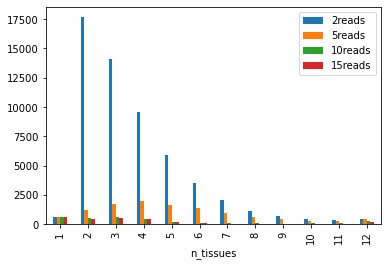

In [452]:
grp_df.plot.bar()

In [453]:
print(len(df10[df10['tumor1']==True]),'muts at tumor1')
print(len(df10[df10['tumor2']==True]),'muts at tumor2')

1438 muts at tumor1
1988 muts at tumor2


In [454]:
print(len(df5[df5['tumor1']==True]),'muts at tumor1')
print(len(df5[df5['tumor2']==True]),'muts at tumor2')

3881 muts at tumor1
4714 muts at tumor2


In [455]:
print(len(df2[df2['tumor1']==True]),'muts at tumor1')
print(len(df2[df2['tumor2']==True]),'muts at tumor2')

10777 muts at tumor1
13040 muts at tumor2


In [456]:
print(len(df15[df15['AF_t1']>0.25]),'clonal muts at tumor1')
print(len(df15[df15['AF_t2']>0.2]),'clonal muts at tumor2')

948 clonal muts at tumor1
1414 clonal muts at tumor2


In [457]:
print(len(df10[df10['AF_t1']>0.25]),'clonal muts at tumor1')
print(len(df10[df10['AF_t2']>0.2]),'clonal muts at tumor2')

948 clonal muts at tumor1
1414 clonal muts at tumor2


In [458]:
print(len(df5[df5['AF_t1']>0.25]),'clonal muts at tumor1')
print(len(df5[df5['AF_t2']>0.2]),'clonal muts at tumor2')

948 clonal muts at tumor1
1414 clonal muts at tumor2


In [459]:
print(len(df2[df2['AF_t1']>0.25]),'clonal muts at tumor1')
print(len(df2[df2['AF_t2']>0.2]),'clonal muts at tumor2')

948 clonal muts at tumor1
1414 clonal muts at tumor2


In [348]:
tissues

dict_keys(['tumor1', 'tumor2', 'blood', 'kidney', 'liver', 'pancreas', 'heart', 'lung', 'medulla', 'spleen', 'brain', 'bma'])

/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


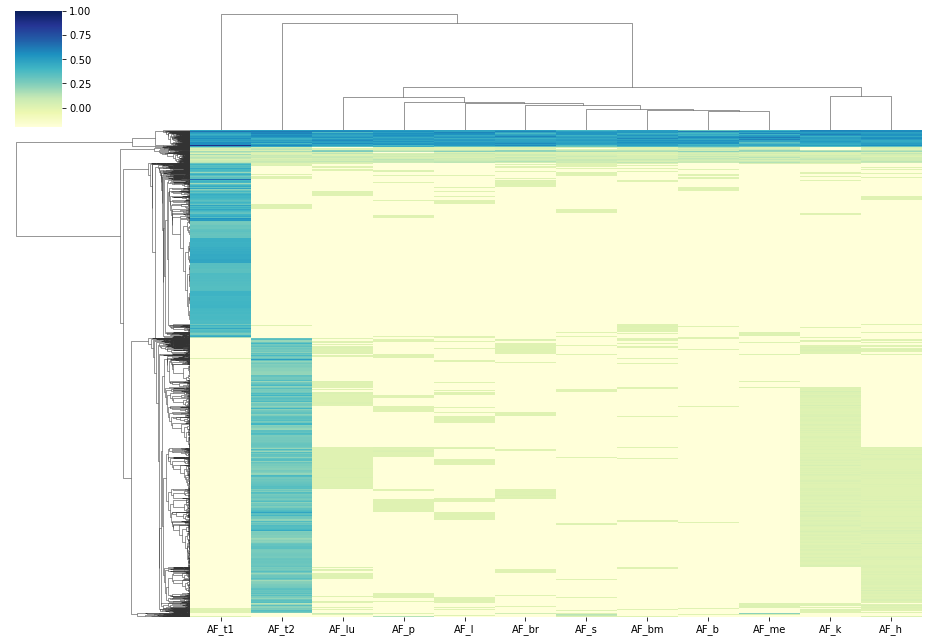

In [464]:
data = df15.sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


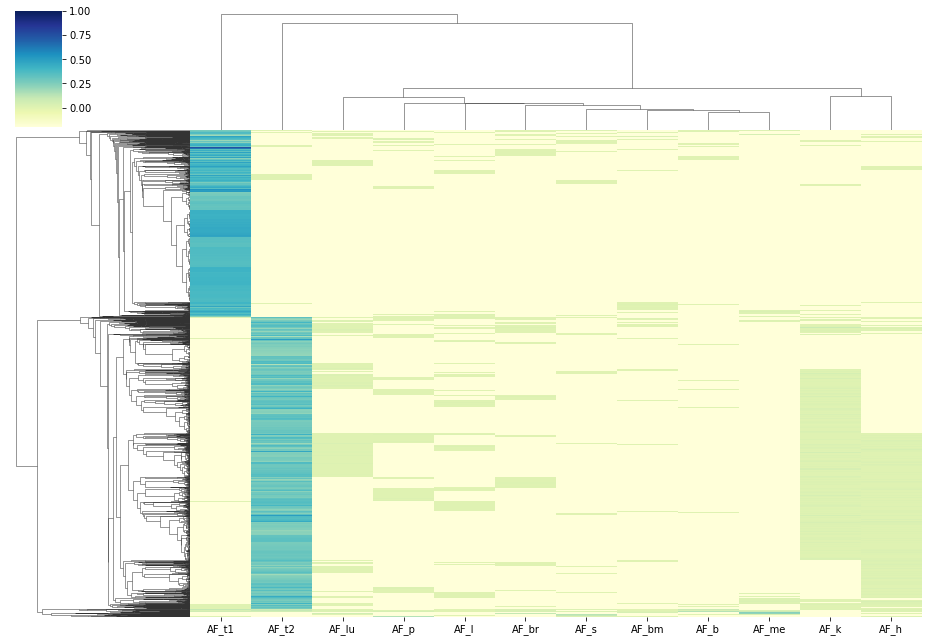

In [418]:
data = df15[df15['n_tissues']!=12].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

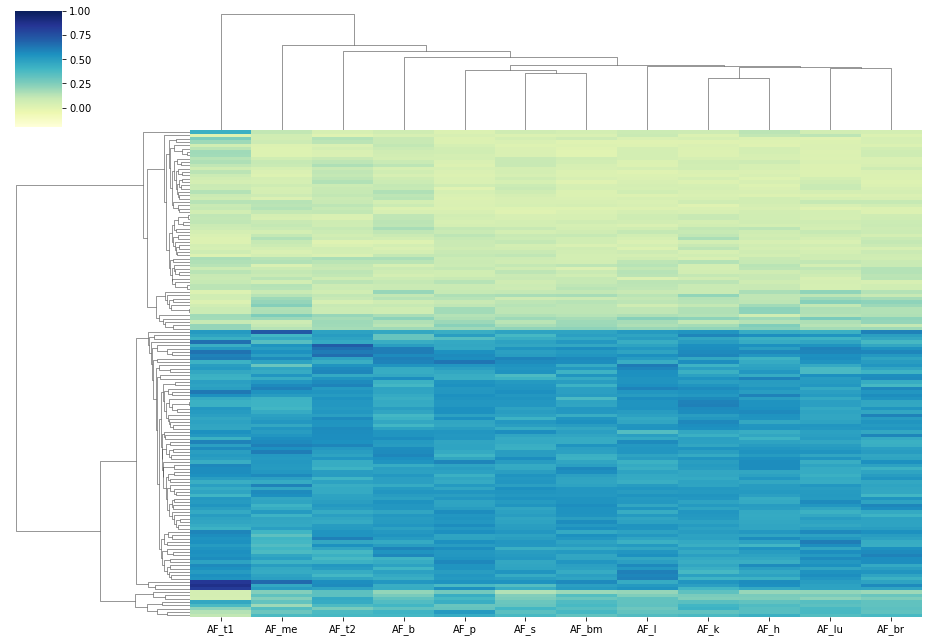

In [465]:
data = df15[df15['n_tissues']==12].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

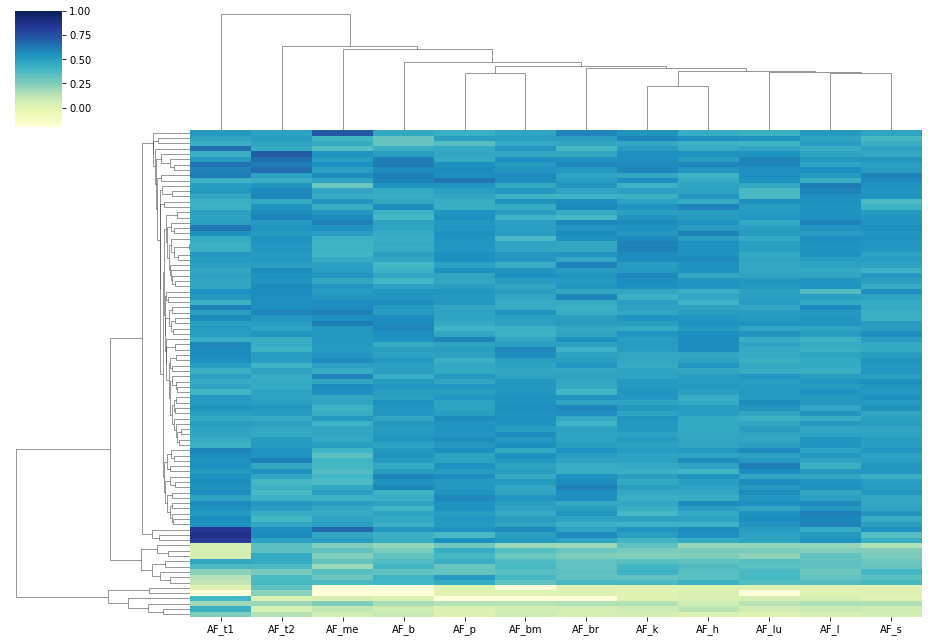

In [484]:
data = df15[(df15['n_tissues']>=8)&((df15['AF_t1']>0.25)|(df15['AF_t2']>0.2))].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

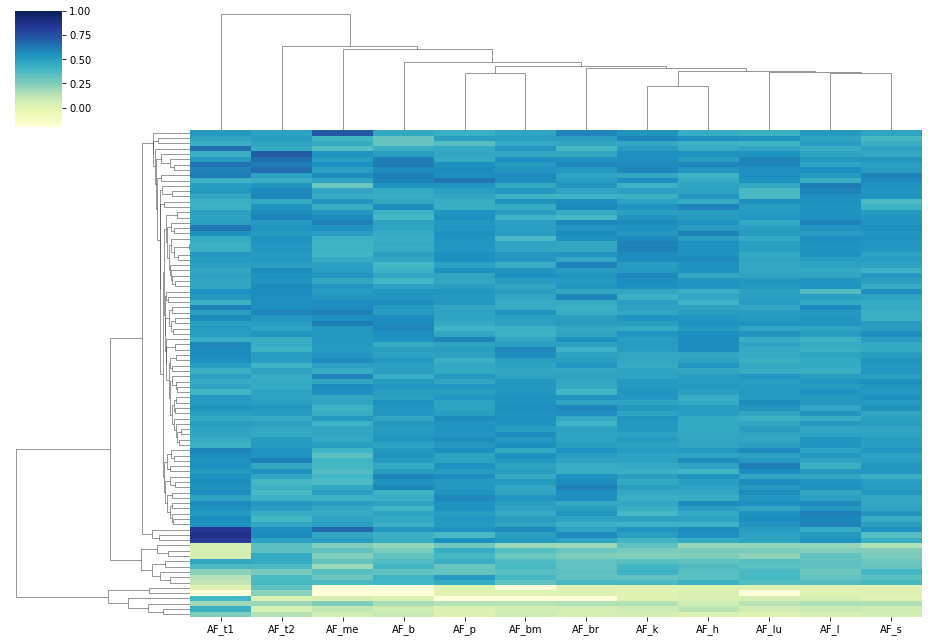

In [485]:
data = df10[(df10['n_tissues']>=8)&((df15['AF_t1']>0.25)|(df15['AF_t2']>0.2))].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

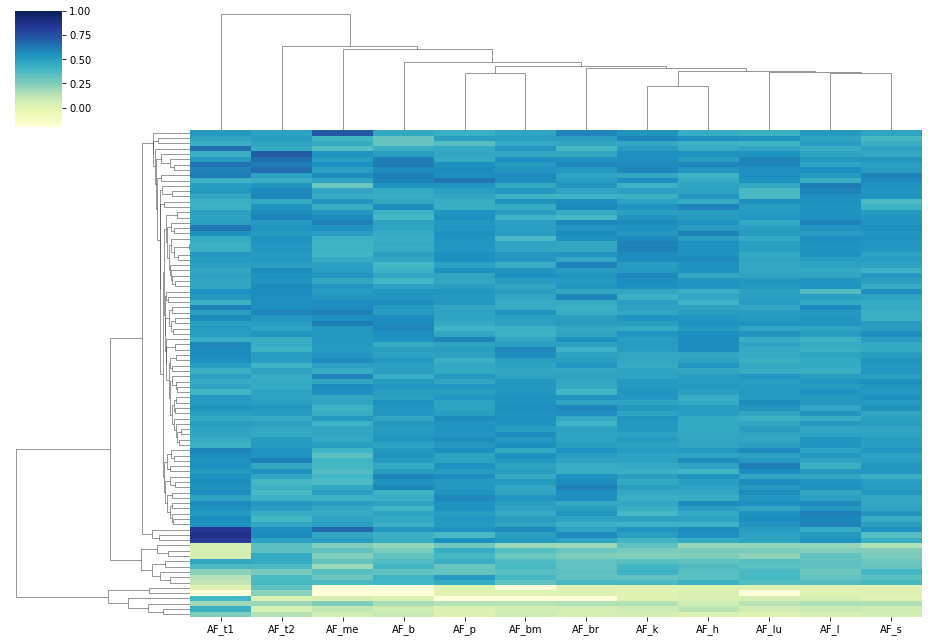

In [486]:
data = df5[(df5['n_tissues']>=8)&((df15['AF_t1']>0.25)|(df15['AF_t2']>0.2))].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


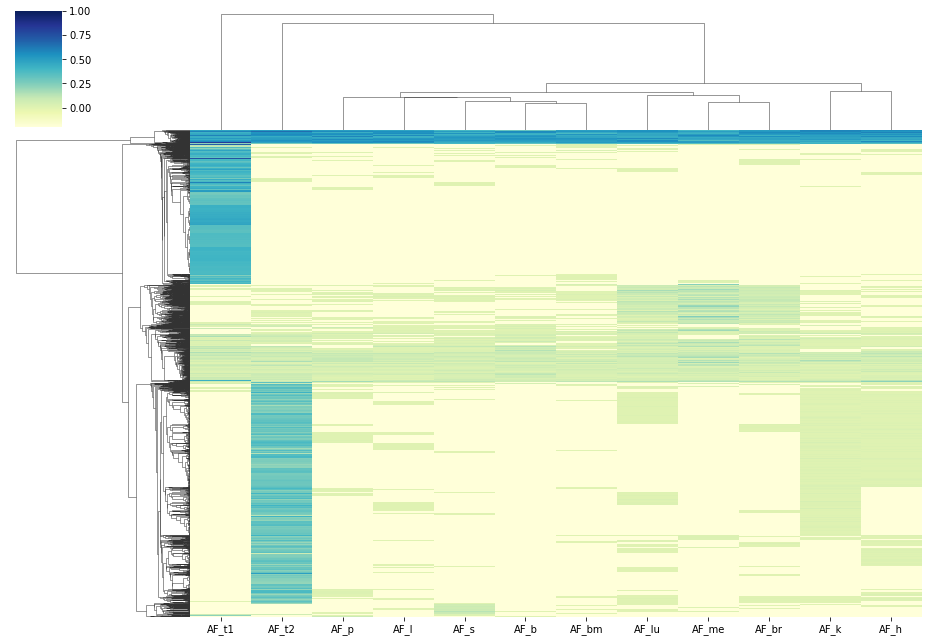

In [460]:
data = df10.sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

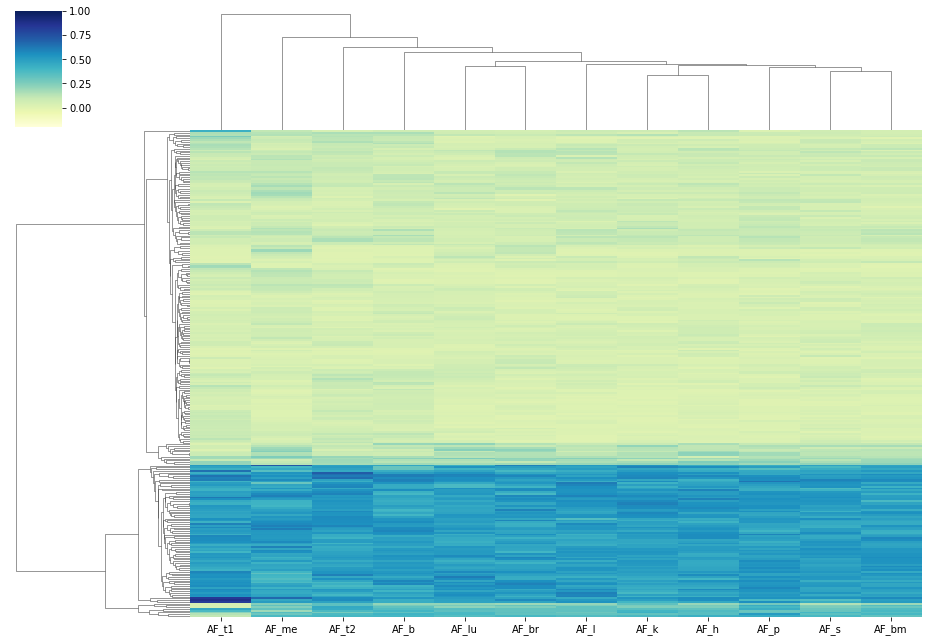

In [491]:
data = df10[df10['n_tissues']==12].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


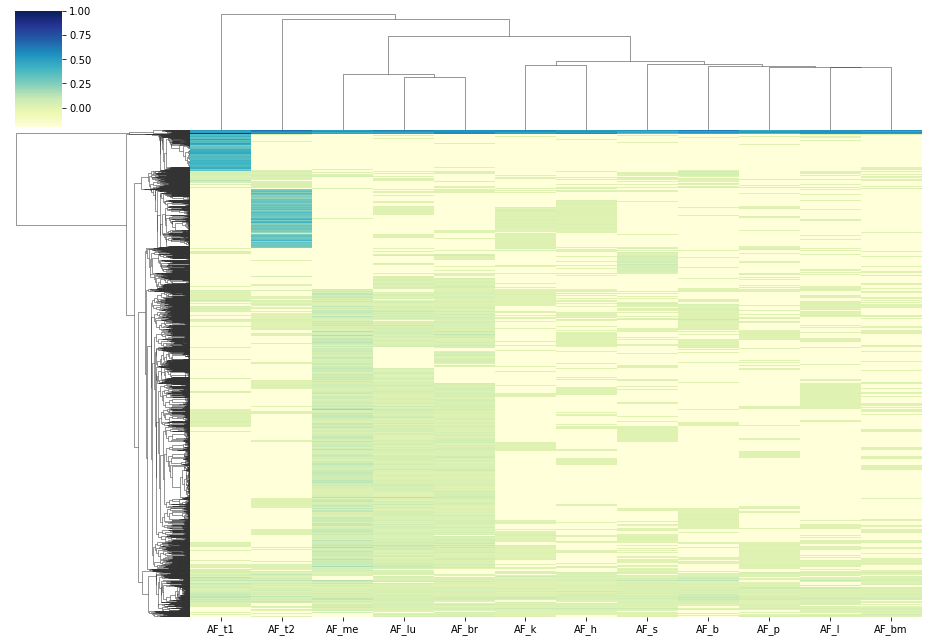

In [461]:
data = df5.sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

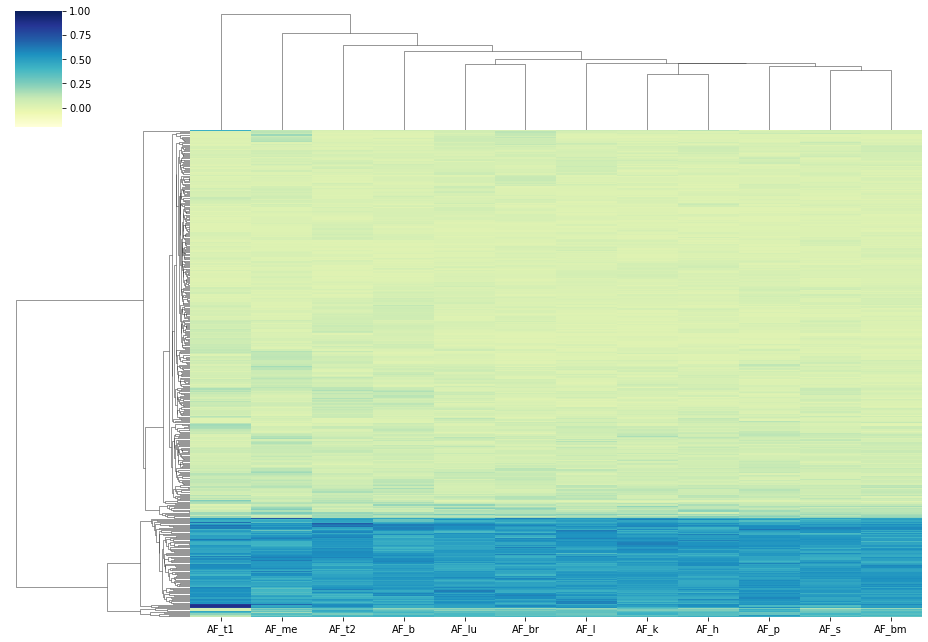

In [490]:
data = df5[df5['n_tissues']==12].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


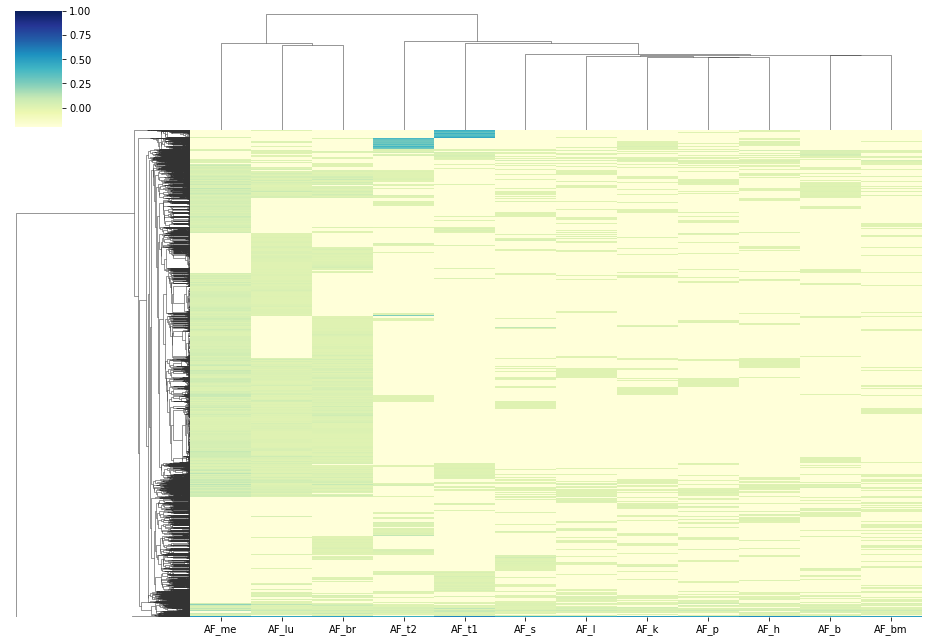

In [488]:
data = df2.sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

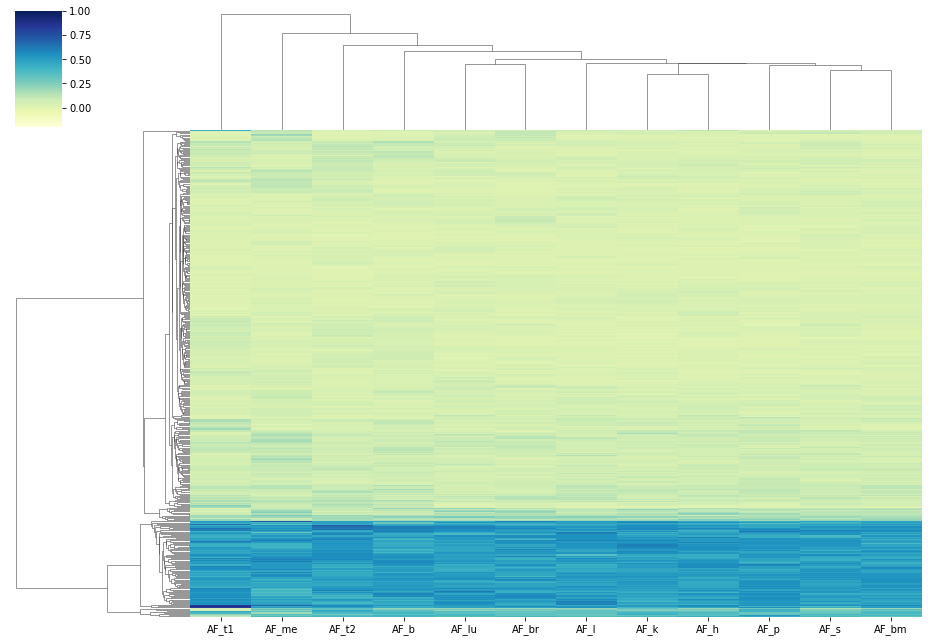

In [489]:
data = df2[df2['n_tissues']==12].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

In [ ]:
for n in range(1,13):
    print('Present in all',n, 'tissues')
    data = df15[df15['n_tissues']==n].sort_values(by=af_cols,ascending=False)
    data[af_cols] = data[af_cols].replace(0,-0.2)
    if len(data) < 50:
        height = 5
        yticklabels = True
    else:
        height = 9
        yticklabels = False
    sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
    plt.show()

Present in all 10 tissues


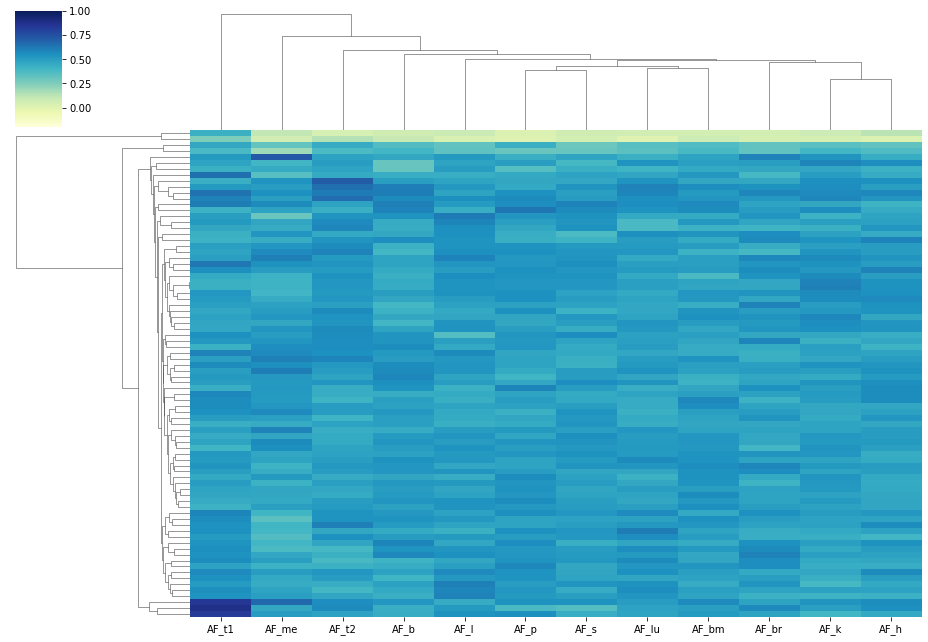

In [433]:
n=10
print('Present in all',n, 'tissues')
data = df15[(df15['n_tissues']>=n)&(df15['AF_t1']>0.25)].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

Present in all 10 tissues


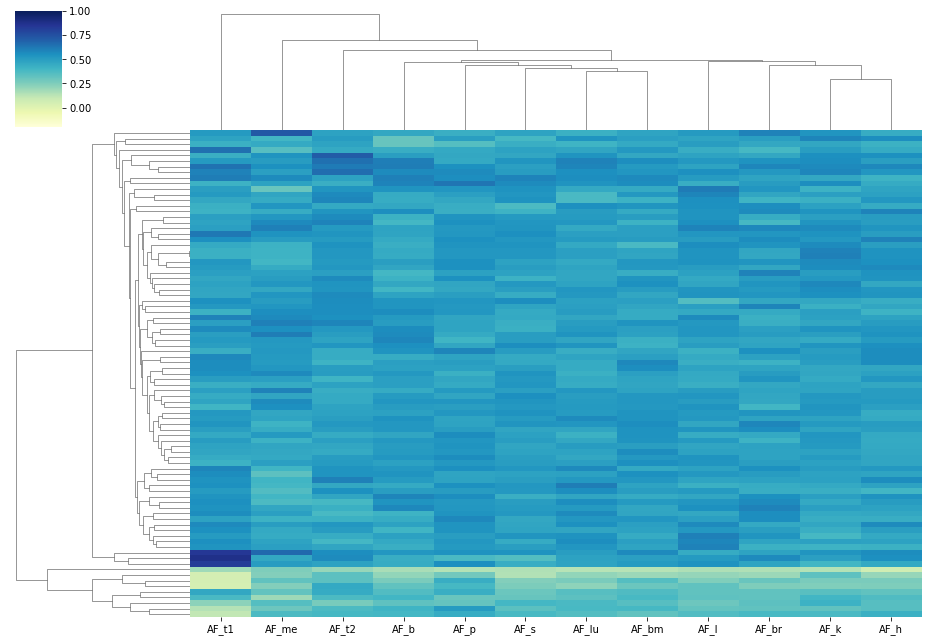

In [432]:
n=10
print('Present in all',n, 'tissues')
data = df15[(df15['n_tissues']>=n)&(df15['AF_t2']>0.2)].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

Present in all 1 tissues


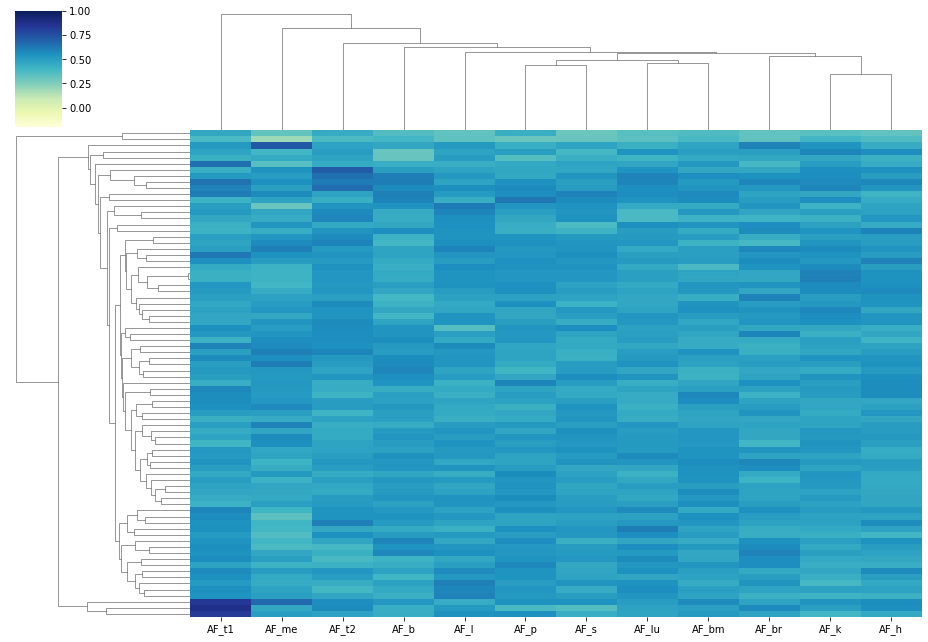

In [435]:
n=1
print('Present in all',n, 'tissues')
data = df15[(df15['n_tissues']>=n)&(df15['AF_t1']>0.25)&(df15['AF_t2']>0.2)].sort_values(by=af_cols,ascending=False)
data[af_cols] = data[af_cols].replace(0,-0.2)
if len(data) < 50:
    height = 5
    yticklabels = True
else:
    height = 9
    yticklabels = False
sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
plt.show()

Present in all 1 tissues


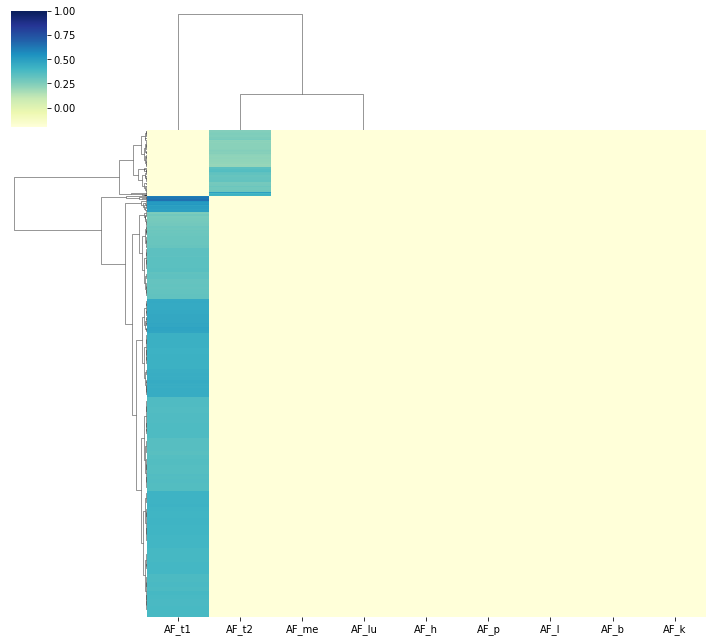

Present in all 2 tissues


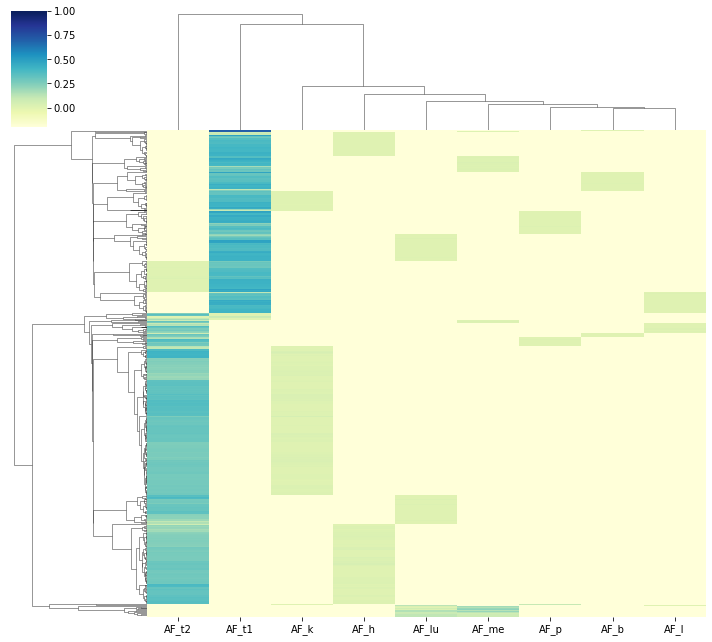

Present in all 3 tissues


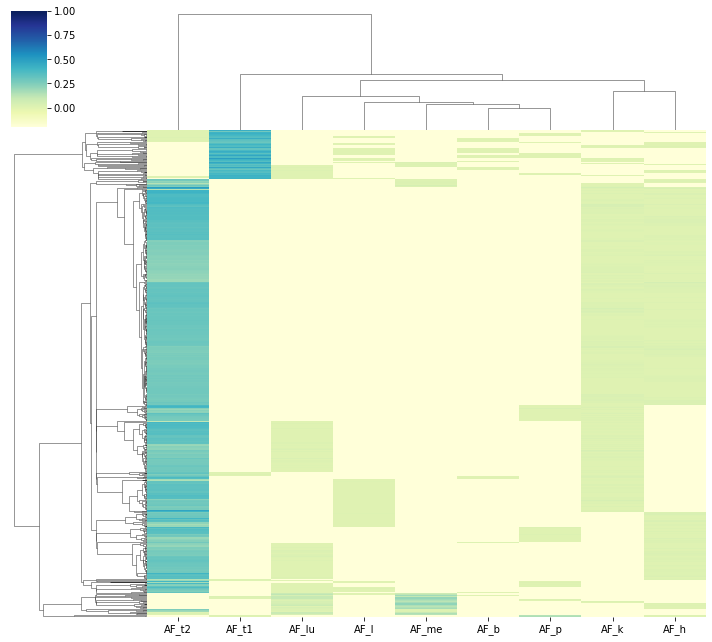

Present in all 4 tissues


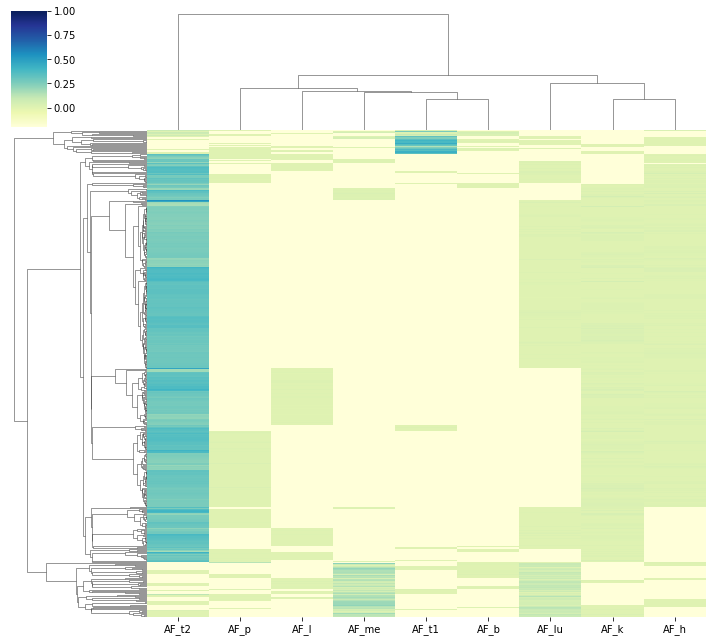

Present in all 5 tissues


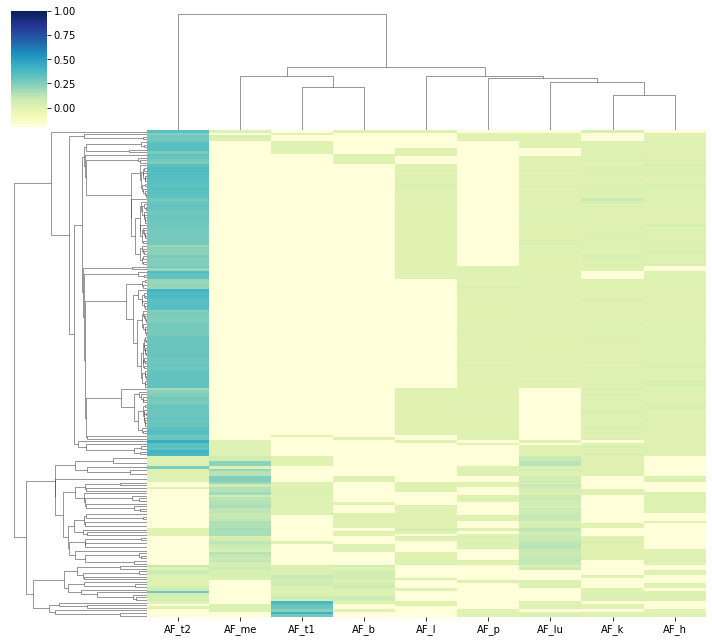

Present in all 6 tissues


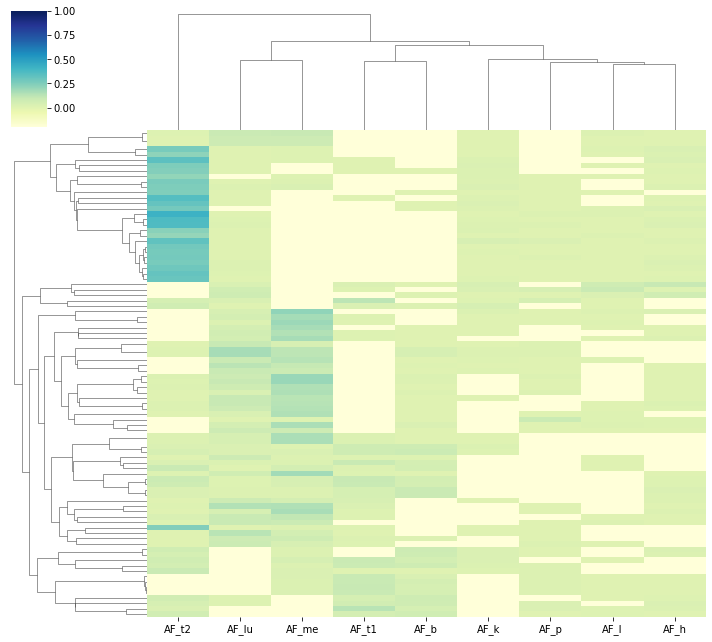

Present in all 7 tissues


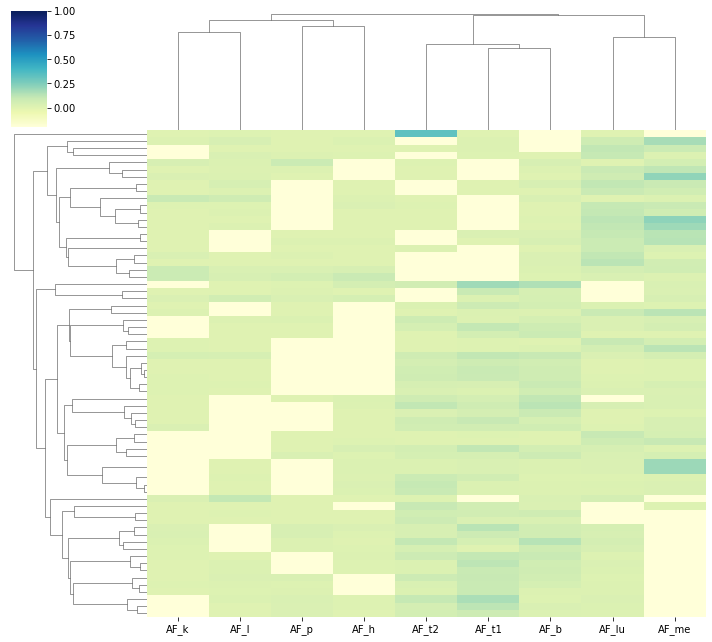

Present in all 8 tissues


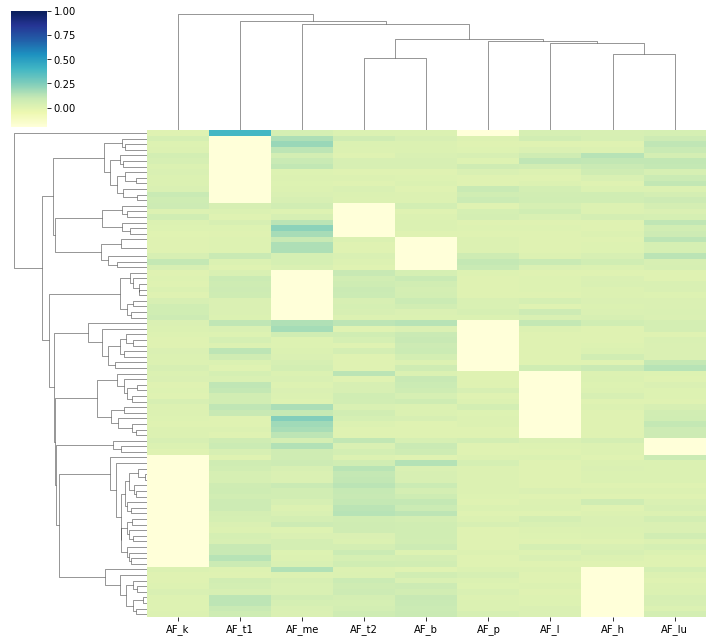

Present in all 9 tissues


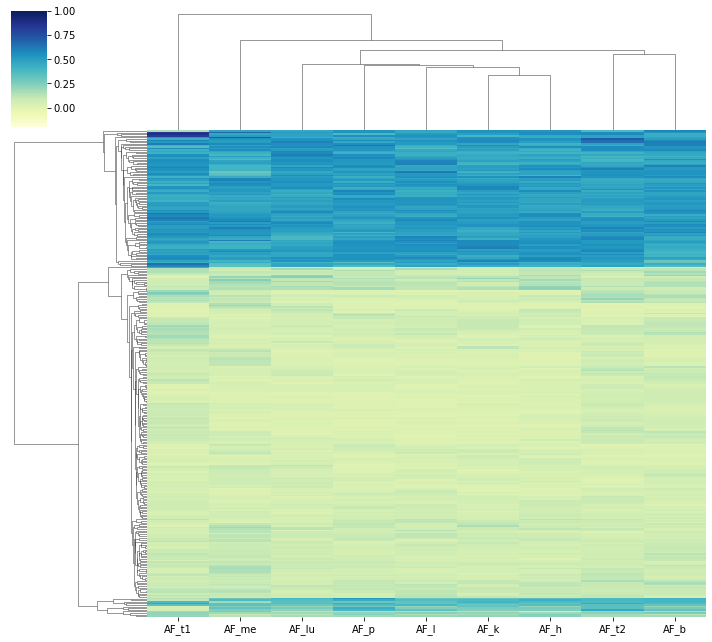

In [220]:
for n in range(1,10):
    print('Present in all',n, 'tissues')
    data = df10[df10['n_tissues']==n].sort_values(by=af_cols,ascending=False)
    data[af_cols] = data[af_cols].replace(0,-0.2)
    if len(data) < 50:
        height = 5
        yticklabels = True
    else:
        height = 9
        yticklabels = False
    sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
    plt.show()

Present in all 1 tissues


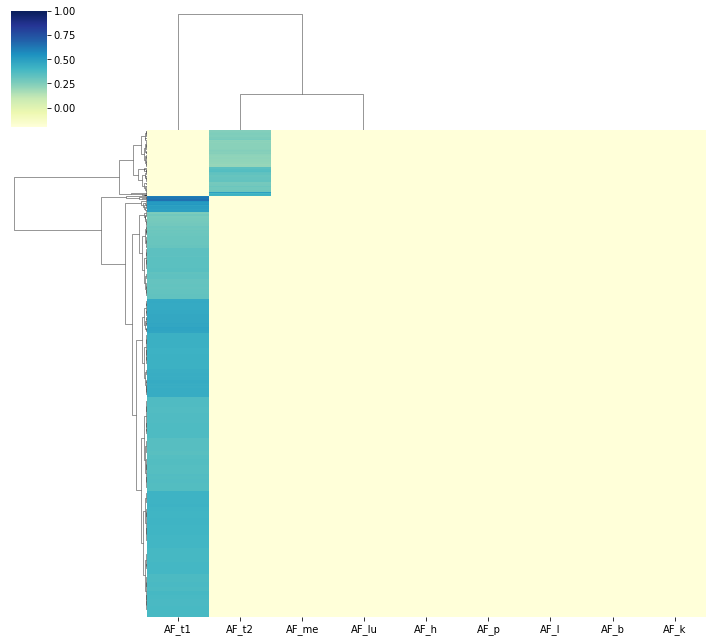

Present in all 2 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


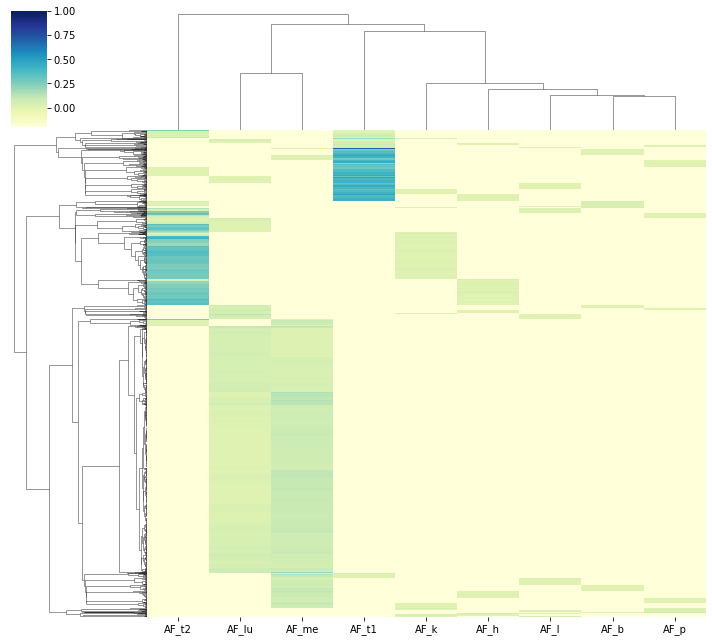

Present in all 3 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


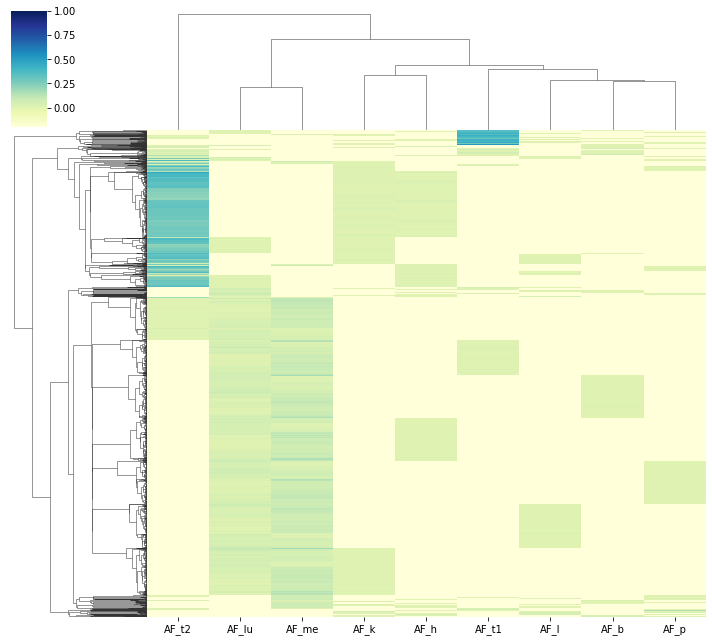

Present in all 4 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


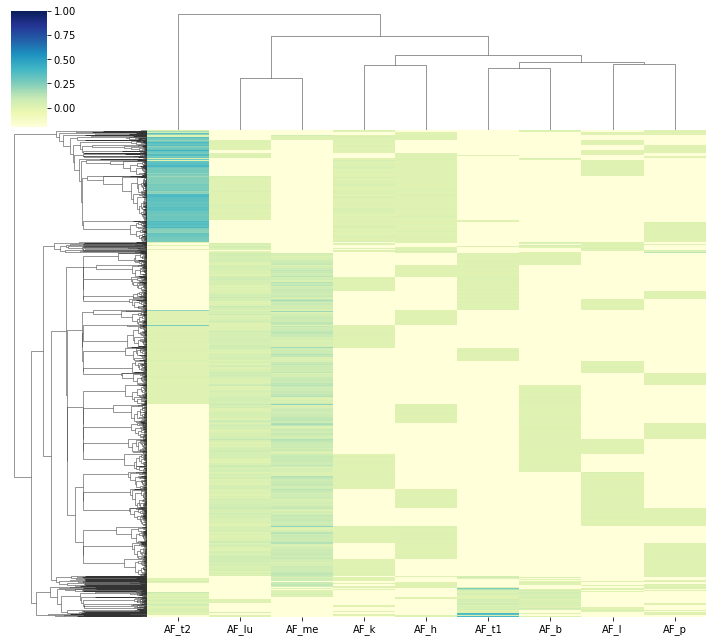

Present in all 5 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


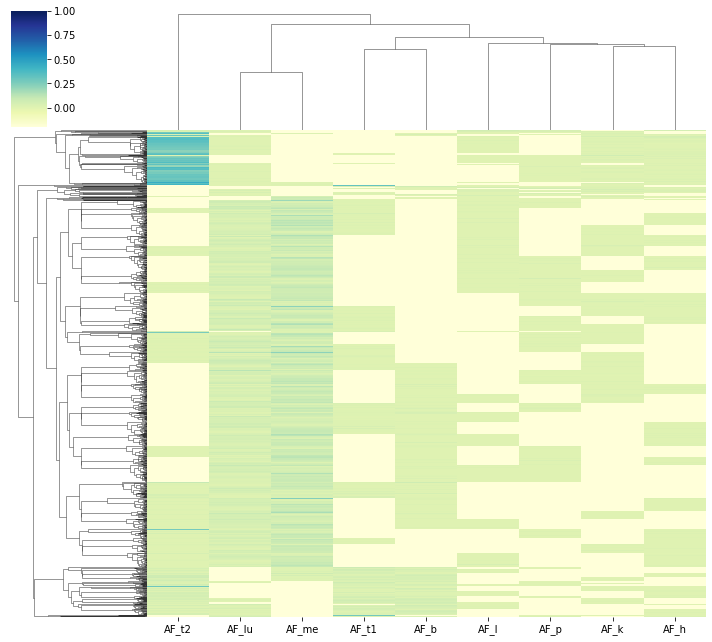

Present in all 6 tissues


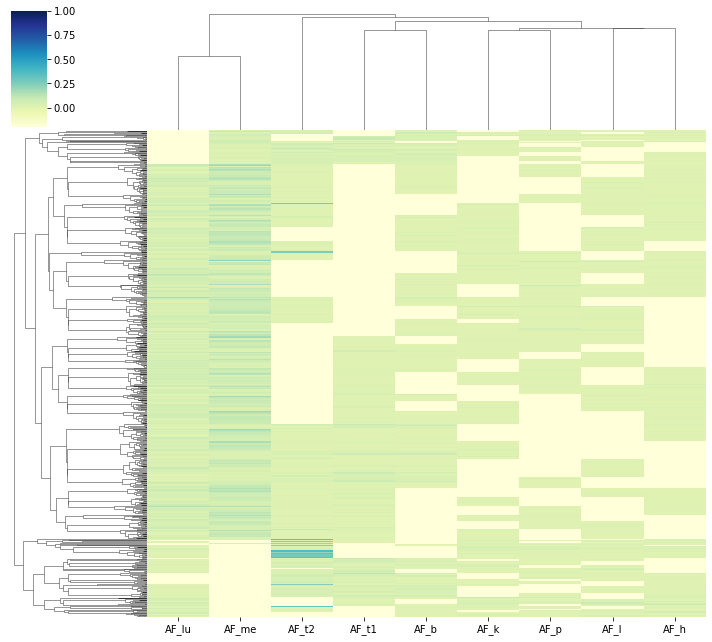

Present in all 7 tissues


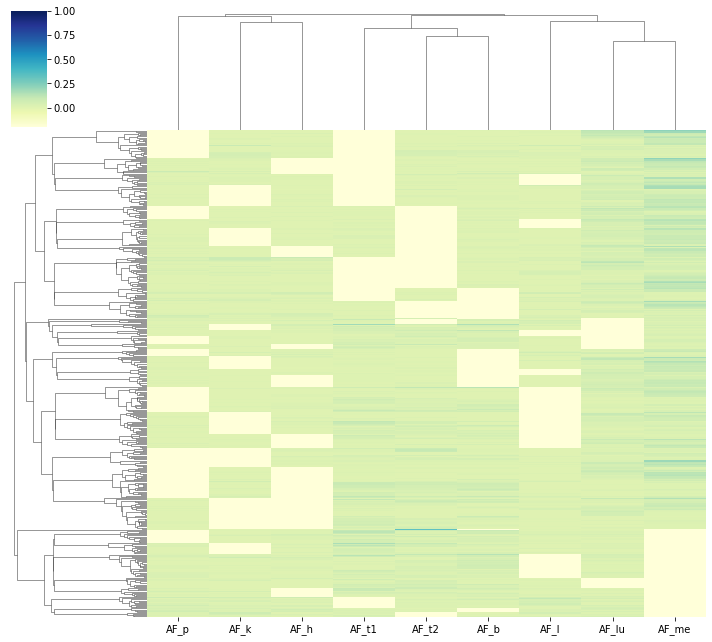

Present in all 8 tissues


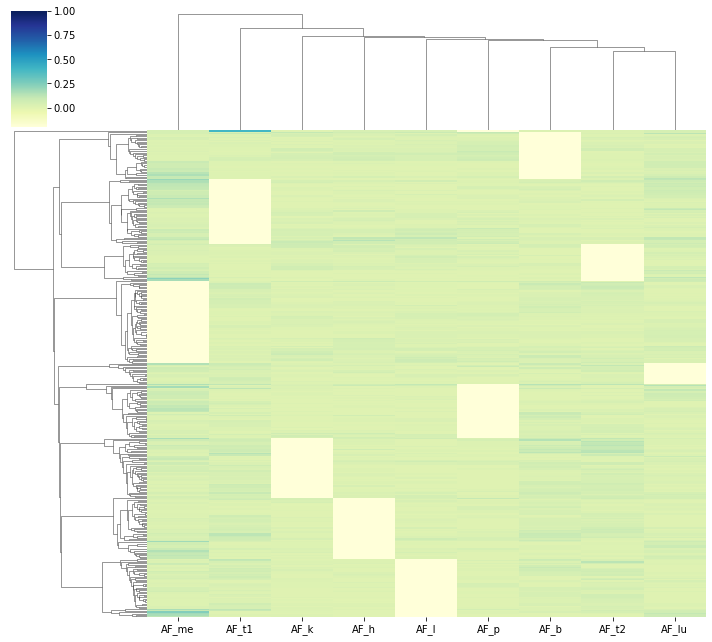

Present in all 9 tissues


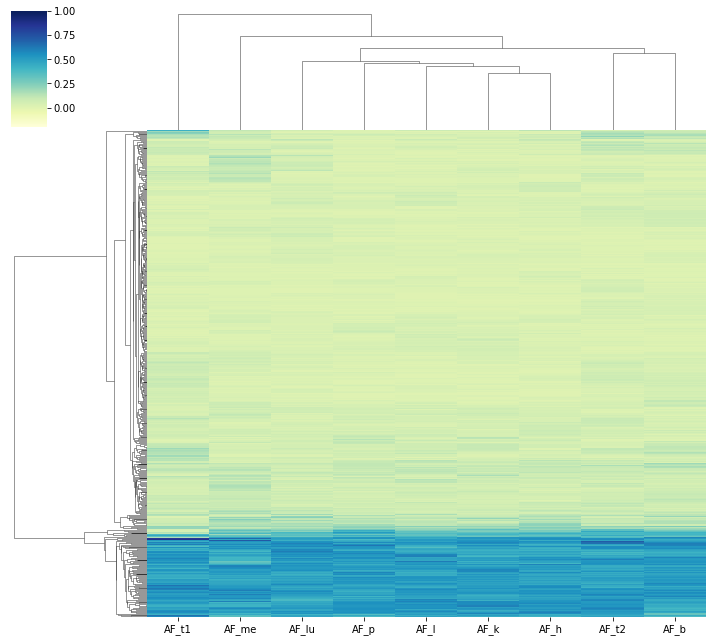

In [221]:
for n in range(1,10):
    print('Present in all',n, 'tissues')
    data = df5[df5['n_tissues']==n].sort_values(by=af_cols,ascending=False)
    data[af_cols] = data[af_cols].replace(0,-0.2)
    if len(data) < 50:
        height = 5
        yticklabels = True
    else:
        height = 9
        yticklabels = False
    sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
    plt.show()

Present in all 1 tissues


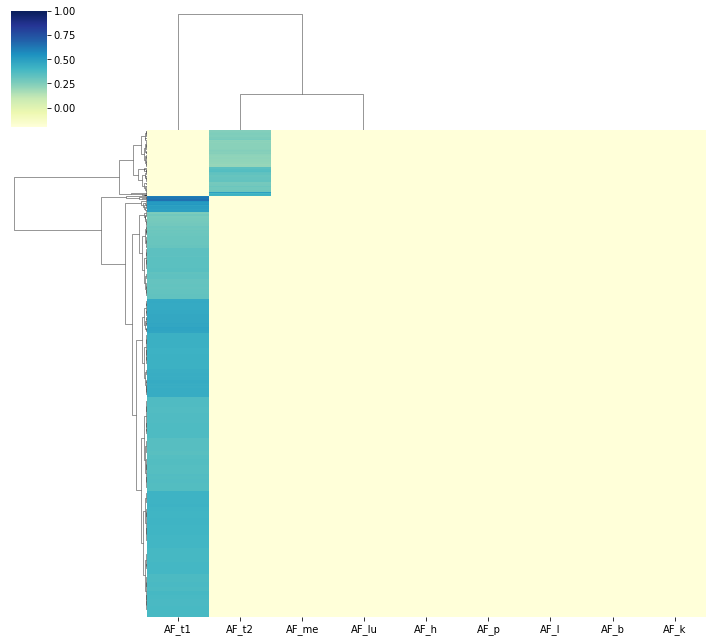

Present in all 2 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


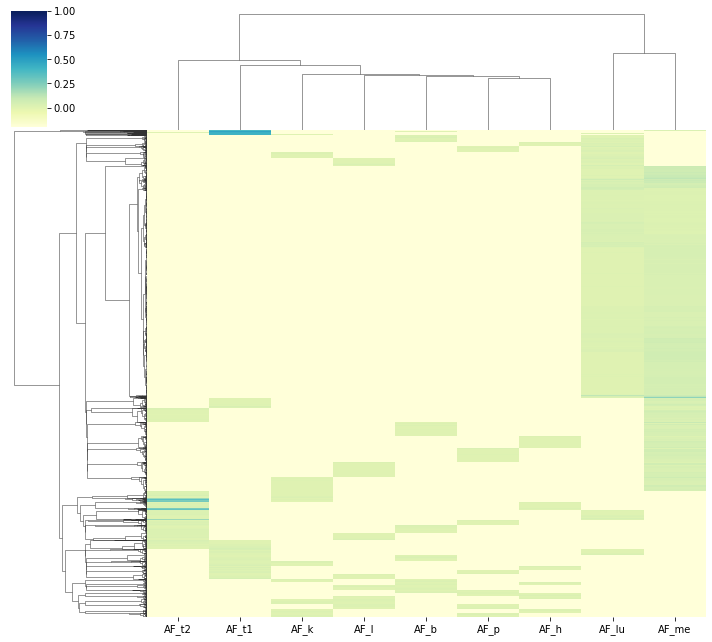

Present in all 3 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


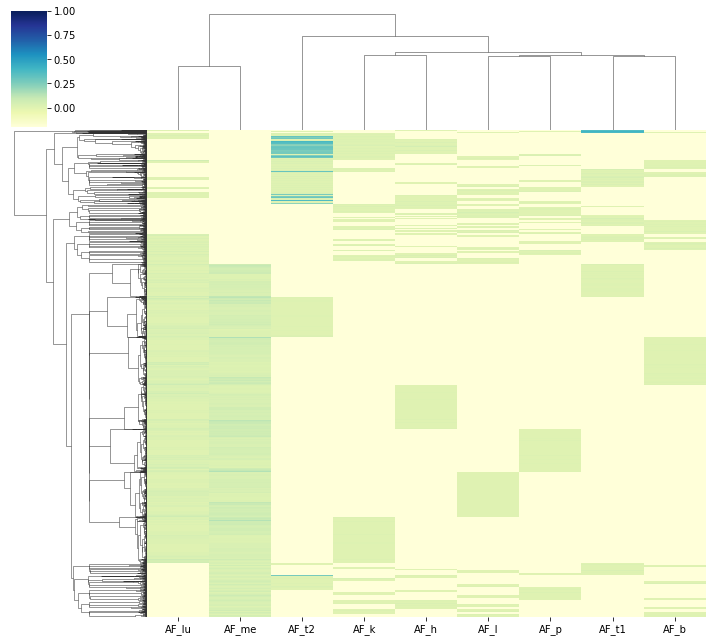

Present in all 4 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


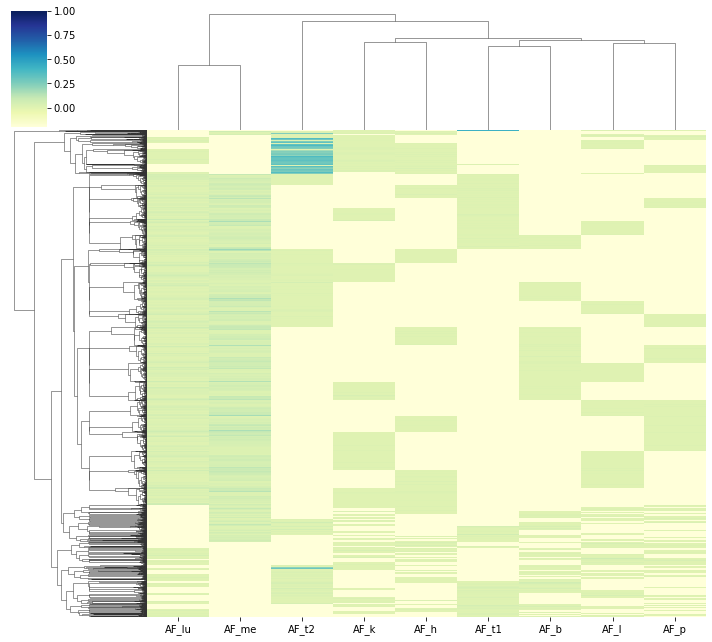

Present in all 5 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


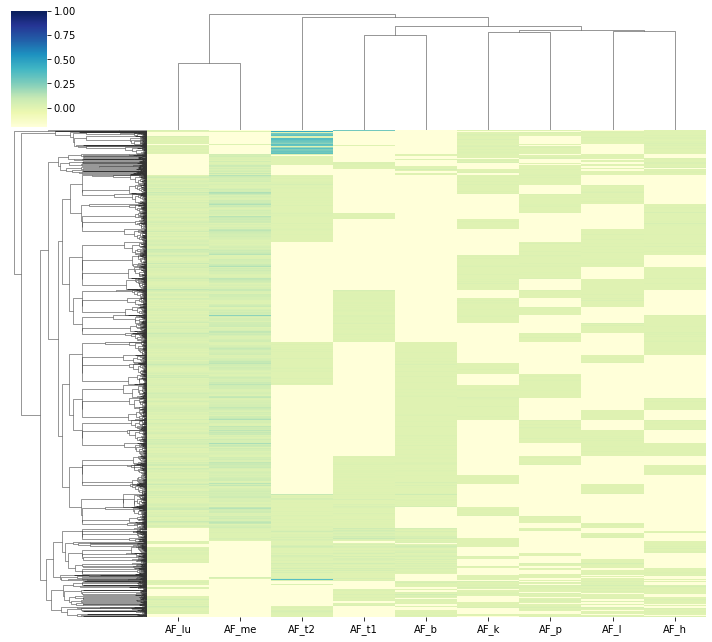

Present in all 6 tissues


/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


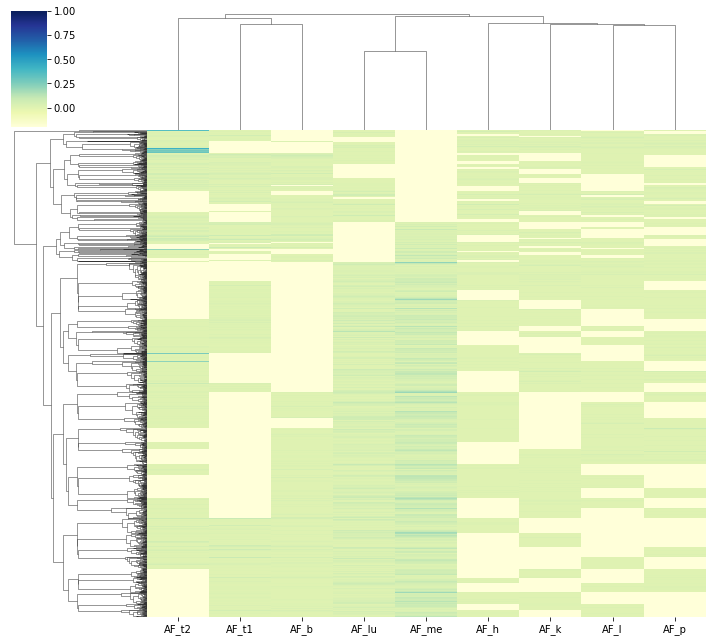

Present in all 7 tissues


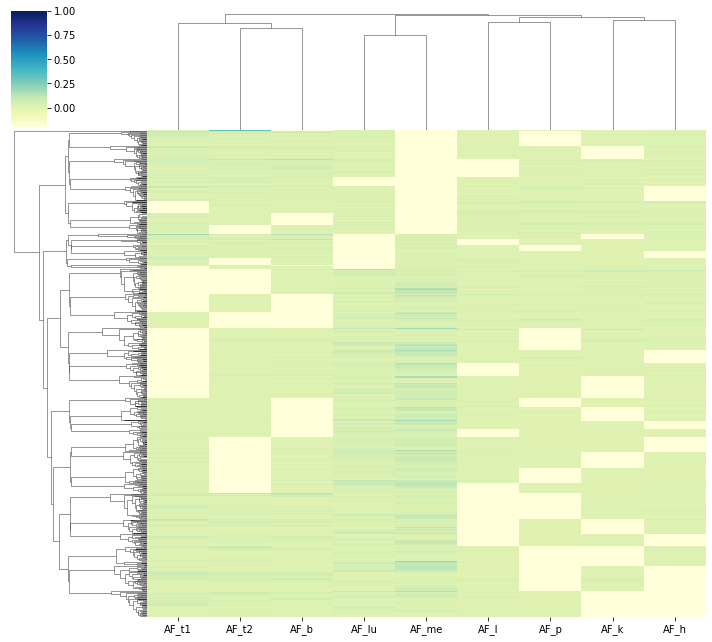

Present in all 8 tissues


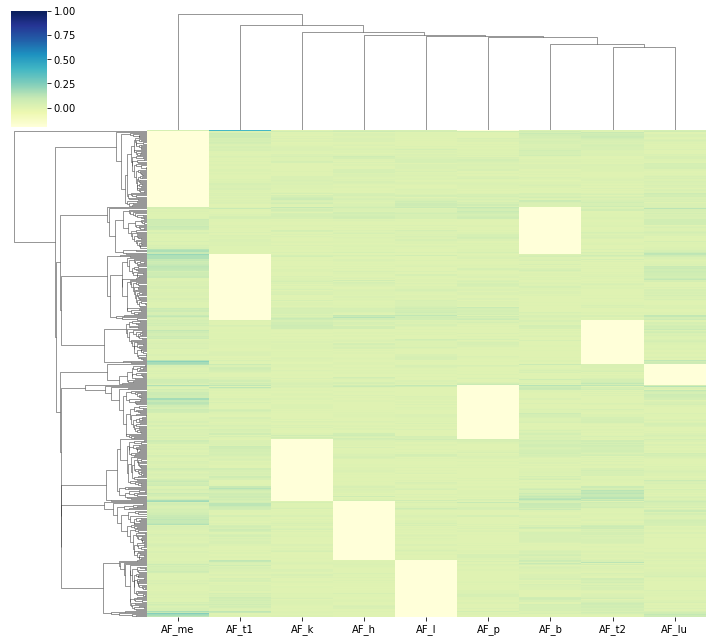

Present in all 9 tissues


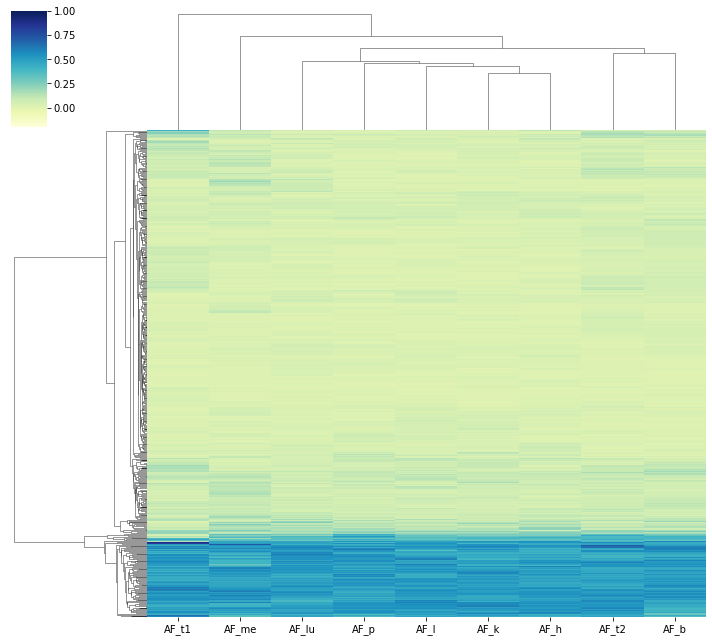

In [222]:
for n in range(1,10):
    print('Present in all',n, 'tissues')
    data = df2[df2['n_tissues']==n].sort_values(by=af_cols,ascending=False)
    data[af_cols] = data[af_cols].replace(0,-0.2)
    if len(data) < 50:
        height = 5
        yticklabels = True
    else:
        height = 9
        yticklabels = False
    sns.clustermap(data[af_cols],cmap="YlGnBu",figsize=((len(tissues)+1),height),vmin=-0.2,vmax=1,yticklabels=yticklabels)
    plt.show()

In [492]:
def density_plot (data,y_var,title,xlim_min,xlim_max, bins=100):
    '''Create density plot for CCF
    input: tumor data, title and xlim max
    output: plot()'''
    
    data = data[(~data[y_var].isnull())]
    data = data[y_var]
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 2)
    ax = sns.distplot(data,rug=True,bins=bins)
    ax.set_title(title,size=20,pad=20)
    ax.set_xlim(xlim_min,xlim_max)

In [499]:
df = df2

/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/msanchezg/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnin

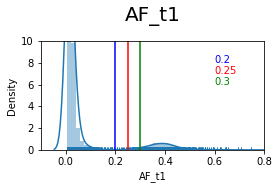

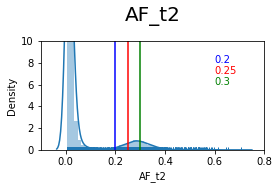

In [500]:
clonal = False
threshold = 0
for tissue in ['tumor1','tumor2']:
    suffix = suffixes_dict[tissue]
    col = 'AF'+suffix
    if clonal == True:
        if tissue == 'tumor1':
            threshold = 0.25
        elif tissue == 'tumor2':
            threshold = 0.2
    else:
        threshold = threshold
    data = df[(df[col]>threshold)]
    y_var = col
    title = col
    xlim = 0.8
    bins = 50
#     sns.displot(data=data,kind='hist')
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=xlim,bins=bins)
    plt.ylim(0,10)
#     plt.axvline(x = 0.15, color = 'hotpink', label = '0.2')
    plt.axvline(x = 0.2, color = 'b', label = '0.2')
    plt.axvline(x = 0.25, color = 'r', label = '0.25')
    plt.axvline(x = 0.3, color = 'g', label = '0.3')
#     plt.text(x=0.6,y=9,s='0.15',color='hotpink')
    plt.text(x=0.6,y=8,s='0.2',color='b')
    plt.text(x=0.6,y=7,s='0.25',color='r')
    plt.text(x=0.6,y=6,s='0.3',color='g')

In [237]:
df10[df10['SYMBOL']=='SMARCB1']

,CHROM,POS,REF,ALT,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_all,mut_type,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,tumor1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,tumor2,AF_b,ref_reads_b,alt_reads_b,DP_b,blood,AF_k,ref_reads_k,alt_reads_k,DP_k,kidney,AF_l,ref_reads_l,alt_reads_l,DP_l,liver,AF_p,ref_reads_p,alt_reads_p,DP_p,pancreas,AF_h,ref_reads_h,alt_reads_h,DP_h,heart,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,lung,AF_me,ref_reads_me,alt_reads_me,DP_me,medulla,AF_m,ref_reads_m,alt_reads_m,DP_m,mother,AF_f,ref_reads_f,alt_reads_f,DP_f,father,tumor1_old,tumor2_old,blood_old,kidney_old,liver_old,pancreas_old,heart_old,lung_old,medulla_old,mother_old,father_old,n_tissues,parents,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,present_at_cohort,present_at_all_bloods,sequencing_artifact,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
7014,chr22,23825237,GTGGG,-,106.0,54.0,142.0,159.0,144.0,127.0,148.0,118.0,64.0,True,True,True,True,True,True,True,True,True,True,indel,0.0,95,0,95,False,0.4,45,30,75,True,0.0,123,0,123,False,0.0,145,0,145,False,0.0,136,0,136,False,0.0,123,0,123,False,0.0142,139,2,141,True,0.0092,108,1,109,True,0.0,56,0,56,False,0.0,22,0,22,False,0.0,33,0,33,False,False,True,False,False,False,False,False,False,False,False,False,3,False,22,23825237,23825241,GTGGG/-,+,22_23825237_GTGGG/-,22:23825237-23825241,-,ENSG00000099956,ENST00000344921,Transcript,frameshift_variant,1042-1046,835-839,279-280,VG/X,GTGGGa/a,-,HIGH,-,1,-,SMARCB1,HGNC,HGNC:11103,YES,ENSP00000340883,-,-,-,-,-,-,-,-,-,-,0.0,-,GTGGG/-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [257]:
mut5_df[['CHROM','POS','REF','ALT']+alt_blood_cols][mut5_df['mut_type']=='snv']

,CHROM,POS,REF,ALT,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26
7,chr1,5670107,G,C,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,chr1,7953574,G,A,2,4,1,4,2,6,6,6,4,4,1,0,2,1,3,2,0,3,0,1,0,1,1,1,4
10,chr1,8139423,G,T,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11,chr1,8502326,G,A,10,8,16,2,16,4,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0
12,chr1,8502333,T,A,13,11,16,9,19,11,5,5,2,1,0,0,2,1,0,0,1,1,2,1,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569784,chrX,155991575,A,C,1,0,1,2,2,1,0,2,2,1,0,1,1,0,2,0,0,2,0,0,0,0,1,0,1
569788,chrX,156007384,A,G,9,6,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
569789,chrX,156007419,C,T,6,5,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
569790,chrX,156007431,A,G,6,5,0,1,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [501]:
df15.to_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/pt1/all_tissues/somatic_files_with_new_tissues/somatic_filtered_artifacts.tsv.gz',index=None,compression='gzip',sep='\t')

In [502]:
df15[df15['AF_t2']>0.2].groupby('mut_type').count()

,CHROM,POS,REF,ALT,parents,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
mut_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
indel,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,0,0,0,0,0,0,0,0,0,0,0,0,151,151,0,0,0,0,0,0,0,0,0,0,0,0,151,151,151,151
snv,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,4,4,4,4,4,4,4,4,4,4,4,4,1263,1263,4,4,4,4,4,4,4,4,4,4,4,4,1263,1263,1263,1263


In [503]:
df15[df15['AF_t1']>0.25].groupby('mut_type').count()

,CHROM,POS,REF,ALT,parents,depth_t1,depth_t2,depth_b,depth_k,depth_l,depth_p,depth_h,depth_lu,depth_me,depth_s,depth_br,depth_bm,filter_depth_t1,filter_depth_t2,filter_depth_b,filter_depth_k,filter_depth_l,filter_depth_p,filter_depth_h,filter_depth_lu,filter_depth_me,filter_depth_s,filter_depth_br,filter_depth_bm,filter_depth_all,AF_t1,ref_reads_t1,alt_reads_t1,DP_t1,AF_t2,ref_reads_t2,alt_reads_t2,DP_t2,AF_b,ref_reads_b,alt_reads_b,DP_b,AF_k,ref_reads_k,alt_reads_k,DP_k,AF_l,ref_reads_l,alt_reads_l,DP_l,AF_p,ref_reads_p,alt_reads_p,DP_p,AF_h,ref_reads_h,alt_reads_h,DP_h,AF_lu,ref_reads_lu,alt_reads_lu,DP_lu,AF_me,ref_reads_me,alt_reads_me,DP_me,AF_s,ref_reads_s,alt_reads_s,DP_s,AF_br,ref_reads_br,alt_reads_br,DP_br,AF_bm,ref_reads_bm,alt_reads_bm,DP_bm,AF_m,ref_reads_m,alt_reads_m,DP_m,AF_f,ref_reads_f,alt_reads_f,DP_f,tumor1,tumor2,blood,kidney,liver,pancreas,heart,lung,medulla,spleen,brain,bma,mother,father,n_tissues,chromosome,start,end,allele,strand,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,SOURCE,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,Change,alt_reads_b2,alt_reads_b3,alt_reads_b4,alt_reads_b5,alt_reads_b6,alt_reads_b7,alt_reads_b8,alt_reads_b9,alt_reads_b10,alt_reads_b11,alt_reads_b12,alt_reads_b13,alt_reads_b14,alt_reads_b15,alt_reads_b16,alt_reads_b17,alt_reads_b18,alt_reads_b19,alt_reads_b20,alt_reads_b21,alt_reads_b22,alt_reads_b23,alt_reads_b24,alt_reads_b25,alt_reads_b26,pval_sa_t1,pval_sa_t2,pval_sa_b,pval_sa_k,pval_sa_l,pval_sa_p,pval_sa_h,pval_sa_lu,pval_sa_me,pval_sa_s,pval_sa_br,pval_sa_bm,present_at_cohort,present_at_all_bloods,qval_sa_t1,qval_sa_t2,qval_sa_b,qval_sa_k,qval_sa_l,qval_sa_p,qval_sa_h,qval_sa_lu,qval_sa_me,qval_sa_s,qval_sa_br,qval_sa_bm,sequencing_artifact_min15,sequencing_artifact_min10,sequencing_artifact_min5,sequencing_artifact_min2
mut_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
indel,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,0,0,0,0,0,0,0,0,0,0,0,0,40,40,0,0,0,0,0,0,0,0,0,0,0,0,40,40,40,40
snv,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,908,4,4,4,4,4,4,4,4,4,4,4,4,908,908,4,4,4,4,4,4,4,4,4,4,4,4,908,908,908,908
